# Linear Regression Analysis on Titanic Dataset

In [6]:
#import libraries
from IPython.display import Markdown as md
import warnings
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)
warnings.filterwarnings('ignore')

In [7]:
#Downloading data from excel sheet into a pandas dataframe
data = pd.read_excel(r'E:\IITm\Sem 7\Data Analytics Lab\Assignment 1\merged_data.xlsx')


In [8]:
df = data.copy()
df.head()

Unnamed: 0 State                            AreaName  All_Poverty  \
0           0    AK      Aleutians East Borough, Alaska          553   
1           1    AK  Aleutians West Census Area, Alaska          499   
2           2    AK      Anchorage Municipality, Alaska        23914   
3           3    AK          Bethel Census Area, Alaska         4364   
4           4    AK         Bristol Bay Borough, Alaska           69   

   M_Poverty  F_Poverty  FIPS  Med_Income  Med_Income_White  Med_Income_Black  \
0        334        219  2013     61518.0           72639.0           31250.0   
1        273        226  2016     84306.0           97321.0           93750.0   
2      10698      13216  2020     78326.0           87235.0           50535.0   
3       2199       2165  2050     51012.0           92647.0           73661.0   
4         33         36  2060     79750.0           88000.0               NaN   

   ...  All_With  All_Without  fips_x  Incidence_Rate  Avg_Ann_Incidence  \
0  ...      1442         1857    2013               *         3 or fewer   
1  ...      4177         1333    2016               *         3 or fewer   
2  ...    243173        44638    2020            61.5                131   
3  ...     13023         4482    2050            62.7                  6   
4  ...       768          191    2060               *         3 or fewer   

   recent_trend  fips_y  Mortality_Rate  Avg_Ann_Deaths  Unnamed: 26  
0             *    2013               *               *          NaN  
1             *    2016               *               *          NaN  
2        stable    2020            47.3              96          NaN  
3        stable    2050            58.3               5          NaN  
4             *    2060               *               *          NaN  

[5 rows x 27 columns]

### Data Preprocessing

In [9]:
df.shape

(3134, 27)

In [10]:
df.drop(['Unnamed: 0'],axis = 1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3133 non-null   float64
 7   Med_Income_White   3132 non-null   float64
 8   Med_Income_Black   1924 non-null   float64
 9   Med_Income_Nat_Am  1474 non-null   float64
 10  Med_Income_Asian   1377 non-null   float64
 11  Hispanic           2453 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

In [12]:
#finding all columns with NULL values
df.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              1
Med_Income_White        2
Med_Income_Black     1210
Med_Income_Nat_Am    1660
Med_Income_Asian     1757
Hispanic              681
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
Unnamed: 26          3134
dtype: int64

In [13]:
# Columns with missing/null values
df_missing = df[['Med_Income','Med_Income_White','Med_Income_Black','Med_Income_Nat_Am','Med_Income_Asian','Hispanic']]
df_missing

Med_Income  Med_Income_White  Med_Income_Black  Med_Income_Nat_Am  \
0        61518.0           72639.0           31250.0            54750.0   
1        84306.0           97321.0           93750.0            48750.0   
2        78326.0           87235.0           50535.0            53935.0   
3        51012.0           92647.0           73661.0            41594.0   
4        79750.0           88000.0               NaN            63333.0   
...          ...               ...               ...                ...   
3129     69022.0           69333.0           23535.0                NaN   
3130     75325.0           77651.0               NaN                NaN   
3131     56569.0           56532.0               NaN                NaN   
3132     47652.0           48110.0               NaN                NaN   
3133     57738.0           57842.0               NaN                NaN   

      Med_Income_Asian  Hispanic  
0              62679.0   51250.0  
1              81250.0   77500.0  
2              63757.0   53926.0  
3             110625.0  160114.0  
4                  NaN   25625.0  
...                ...       ...  
3129               NaN   53175.0  
3130               NaN   41619.0  
3131               NaN   40194.0  
3132               NaN   29740.0  
3133               NaN   31875.0  

[3134 rows x 6 columns]

In [14]:
#Find mean, median, mode for replacing the null values in the respective columns
for col in list(df_missing.columns):
    print(col)
    print("mean : ",df_missing[col].mean())
    print("median : ",df_missing[col].median())
    print("mode : ",df_missing[col].mode())
    print('-----------------------------------------')

Med_Income
mean :  46819.83785509097
median :  45075.0
mode :  0    48750.0
dtype: float64
-----------------------------------------
Med_Income_White
mean :  49490.181992337166
median :  47430.0
mode :  0    40000.0
1    41250.0
2    42083.0
3    43750.0
dtype: float64
-----------------------------------------
Med_Income_Black
mean :  34750.214137214134
median :  30000.0
mode :  0    2499.0
dtype: float64
-----------------------------------------
Med_Income_Nat_Am
mean :  43309.9986431479
median :  39014.0
mode :  0    2499.0
dtype: float64
-----------------------------------------
Med_Income_Asian
mean :  65412.96949891067
median :  60405.0
mode :  0    2499.0
dtype: float64
-----------------------------------------
Hispanic
mean :  41118.23155320017
median :  38347.0
mode :  0    38750.0
dtype: float64
-----------------------------------------


In [15]:
#Distribution plots of the columns with missing values
def box_dist_plots(col):
    plt.figure(figsize=(14,7))
    plt.subplot(1,2,1)
    sns.boxplot(df[col])
    plt.title(f'Box plot of {col}')
    plt.subplot(1,2,2)
    sns.distplot(df[col])
    plt.title(f'Dist plot of {col}')
    plt.tight_layout()
    

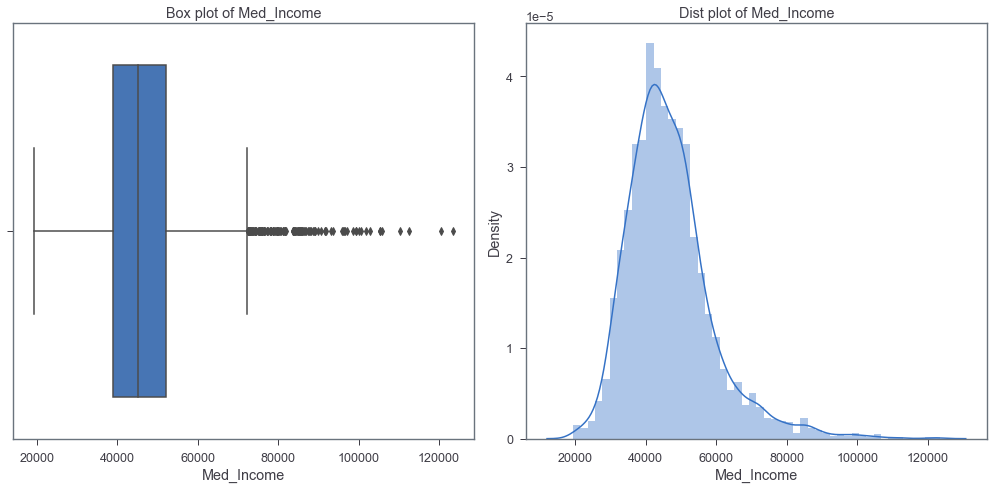

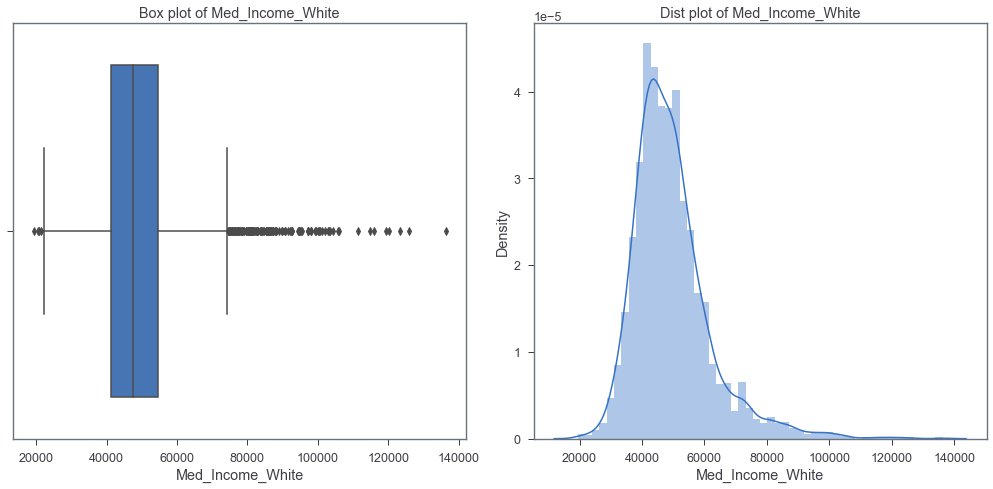

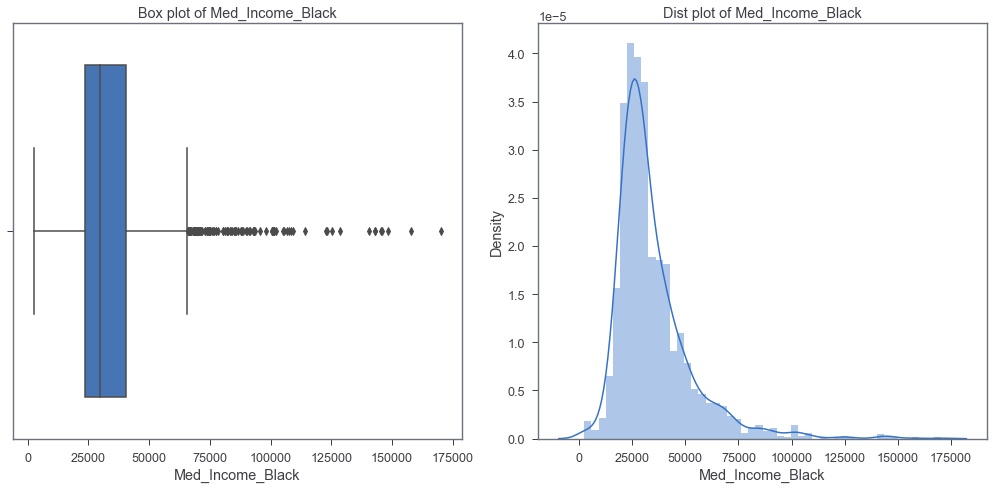

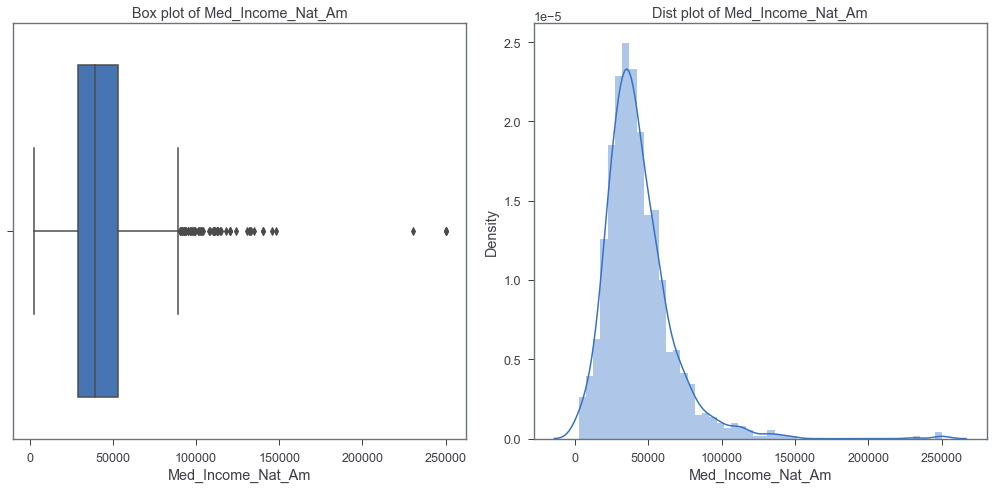

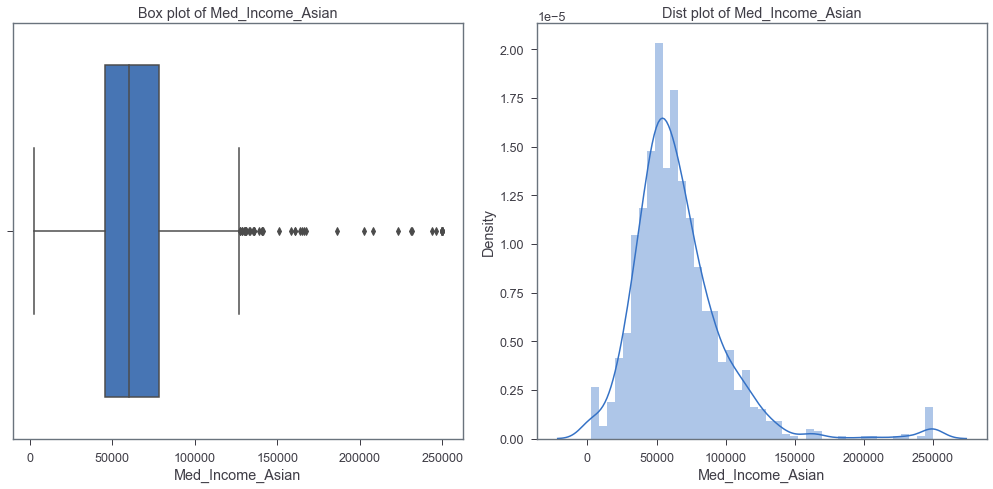

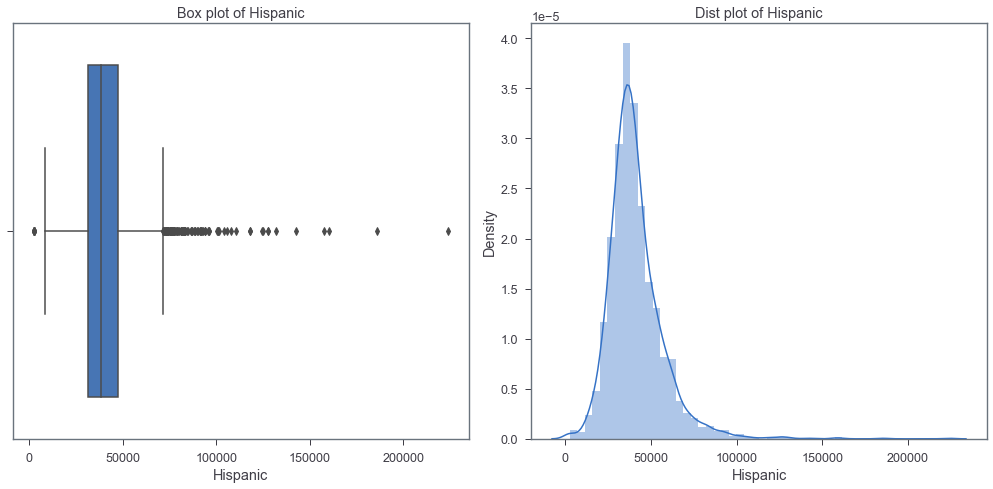

In [16]:
for col in list(df_missing.columns):
    box_dist_plots(col)

The mean and median don't differ by much in the above distribution plots. So we can replace the NaN values with the mean/median.

In [17]:
for col in list(df_missing.columns):
    df[col].fillna(df[col].mean(), inplace=True)
    df_missing.fillna(df_missing[col].mean(), inplace=True)

In [18]:
df.isna().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              0
Med_Income_White        0
Med_Income_Black        0
Med_Income_Nat_Am       0
Med_Income_Asian        0
Hispanic                0
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
Unnamed: 26          3134
dtype: int64

In [19]:
df


State                            AreaName  All_Poverty  M_Poverty  \
0       AK      Aleutians East Borough, Alaska          553        334   
1       AK  Aleutians West Census Area, Alaska          499        273   
2       AK      Anchorage Municipality, Alaska        23914      10698   
3       AK          Bethel Census Area, Alaska         4364       2199   
4       AK         Bristol Bay Borough, Alaska           69         33   
...    ...                                 ...          ...        ...   
3129    WY          Sweetwater County, Wyoming         5058       2177   
3130    WY               Teton County, Wyoming         1638       1026   
3131    WY               Uinta County, Wyoming         2845       1453   
3132    WY            Washakie County, Wyoming         1137        489   
3133    WY              Weston County, Wyoming          958        354   

      F_Poverty   FIPS  Med_Income  Med_Income_White  Med_Income_Black  \
0           219   2013     61518.0           72639.0      31250.000000   
1           226   2016     84306.0           97321.0      93750.000000   
2         13216   2020     78326.0           87235.0      50535.000000   
3          2165   2050     51012.0           92647.0      73661.000000   
4            36   2060     79750.0           88000.0      34750.214137   
...         ...    ...         ...               ...               ...   
3129       2881  56037     69022.0           69333.0      23535.000000   
3130        612  56039     75325.0           77651.0      34750.214137   
3131       1392  56041     56569.0           56532.0      34750.214137   
3132        648  56043     47652.0           48110.0      34750.214137   
3133        604  56045     57738.0           57842.0      34750.214137   

      Med_Income_Nat_Am  ...  All_With  All_Without  fips_x  Incidence_Rate  \
0          54750.000000  ...      1442         1857    2013               *   
1          48750.000000  ...      4177         1333    2016               *   
2          53935.000000  ...    243173        44638    2020            61.5   
3          41594.000000  ...     13023         4482    2050            62.7   
4          63333.000000  ...       768          191    2060               *   
...                 ...  ...       ...          ...     ...             ...   
3129       43309.998643  ...     38491         6001   56037            39.9   
3130       43309.998643  ...     18503         3750   56039            23.7   
3131       43309.998643  ...     17843         2916   56041            31.7   
3132       43309.998643  ...      6839         1394   56043              50   
3133       43309.998643  ...      6014          768   56045            44.9   

      Avg_Ann_Incidence  recent_trend  fips_y  Mortality_Rate  Avg_Ann_Deaths  \
0            3 or fewer             *    2013               *               *   
1            3 or fewer             *    2016               *               *   
2                   131        stable    2020            47.3              96   
3                     6        stable    2050            58.3               5   
4            3 or fewer             *    2060               *               *   
...                 ...           ...     ...             ...             ...   
3129                 14        stable   56037            28.4               9   
3130                  5        stable   56039            29.1               5   
3131                  6        stable   56041            22.1               4   
3132                  6        stable   56043            38.2               5   
3133                  4        stable   56045            43.5               4   

     Unnamed: 26  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
3129         NaN  
3130         NaN  
3131         NaN  
3132         NaN  
3133         NaN  

[3134 rows x 26 columns]

In [20]:
df.replace(['*','**'], np.NAN, inplace=True)
df.isna().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              0
Med_Income_White        0
Med_Income_Black        0
Med_Income_Nat_Am       0
Med_Income_Asian        0
Hispanic                0
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate        211
Avg_Ann_Incidence       0
recent_trend          258
fips_y                  0
Mortality_Rate        325
Avg_Ann_Deaths        325
Unnamed: 26          3134
dtype: int64

In [21]:
df['recent_trend'].unique()

array([nan, 'stable', 'falling', 'rising', '_', '__'], dtype=object)

### 'Incidence rate', 'Mortality rate', 'Avg_Ann_Deaths'

In [22]:
#Finding mean, median and mode in Incidence Rate, Mortality Rate and Avg Annual Death rate columns
cols = ['Incidence_Rate','Mortality_Rate','Avg_Ann_Deaths']
for col in cols:
    print(col)
    df[col] = pd.to_numeric(df[col], errors='coerce', downcast='float')
    print("mean : ",df[col].mean())
    print("median : ",df[col].median())
    print("mode : ",df[col].mode())
    print('-------------------------------------')

Incidence_Rate
mean :  69.94277954101562
median :  69.5
mode :  0    65.199997
dtype: float32
-------------------------------------
Mortality_Rate
mean :  53.18854522705078
median :  52.599998474121094
mode :  0    48.299999
dtype: float32
-------------------------------------
Avg_Ann_Deaths
mean :  55.822357177734375
median :  21.0
mode :  0    5.0
dtype: float32
-------------------------------------


In [23]:
df[cols].describe()

Incidence_Rate  Mortality_Rate  Avg_Ann_Deaths
count     2635.000000     2809.000000     2809.000000
mean        69.942780       53.188545       55.822357
std         17.983042       14.042087      127.709694
min         13.500000        9.200000        3.000000
25%         58.299999       43.700001       10.000000
50%         69.500000       52.599998       21.000000
75%         80.149994       61.200001       48.000000
max        203.699997      125.599998     2876.000000

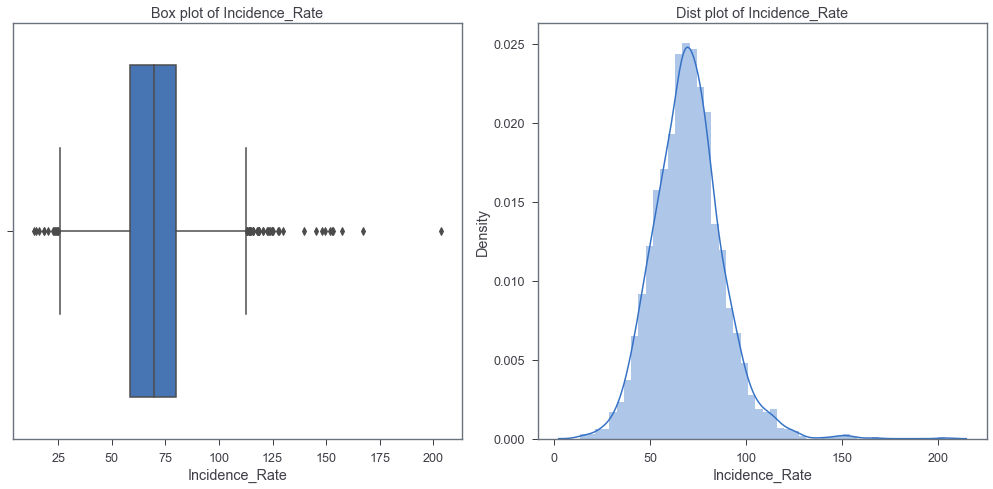

In [24]:
box_dist_plots('Incidence_Rate')

The 

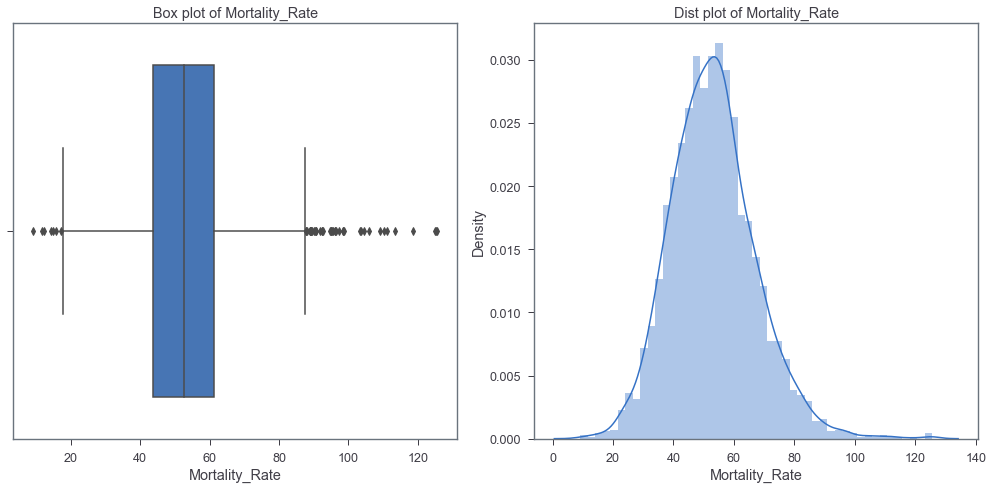

In [25]:
box_dist_plots('Mortality_Rate')

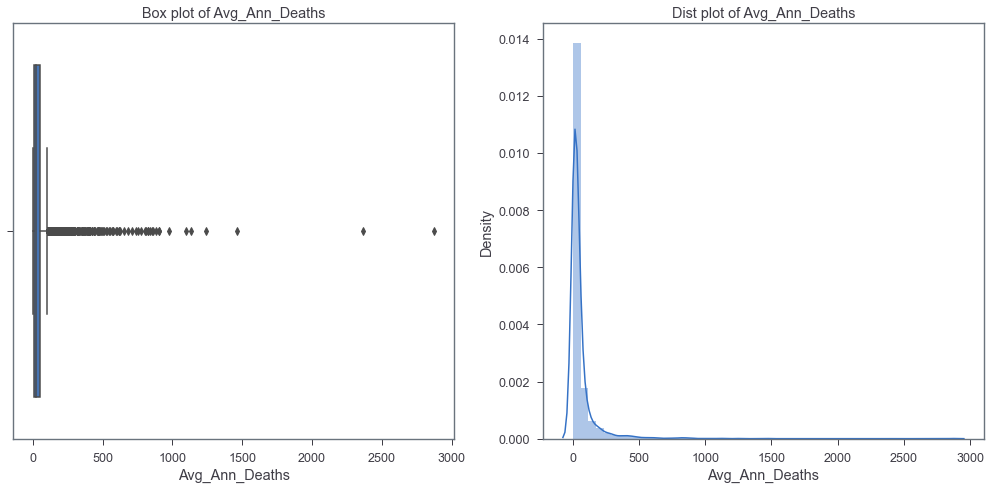

In [26]:
box_dist_plots('Avg_Ann_Deaths')

The plots above show that the distribution curve of Avg Annual Deaths is very skewed towards the right, so the mean is highly affected by outliers. We should replace the missing values in Avg Annual Deaths column with Median instead of mean.

In [27]:
for col in cols:
    df[col].fillna(df[col].median(), inplace=True)

### Recent Trend

In [28]:
# Recent Trend : It is categorical column. Should replace the NaN values with mode to maintain generality.
df.replace(['_','__'],np.NAN, inplace=True)
df['recent_trend'].fillna(df['recent_trend'].mode()[0], inplace=True)

In [29]:
df.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              0
Med_Income_White        0
Med_Income_Black        0
Med_Income_Nat_Am       0
Med_Income_Asian        0
Hispanic                0
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence     209
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
Unnamed: 26          3134
dtype: int64

In [30]:
df['Avg_Ann_Incidence']

0       3 or fewer
1       3 or fewer
2              131
3                6
4       3 or fewer
           ...    
3129            14
3130             5
3131             6
3132             6
3133             4
Name: Avg_Ann_Incidence, Length: 3134, dtype: object

In [31]:
df['Avg_Ann_Incidence'].unique()

array(['3 or fewer', 131, 6, 36, 9, 39, 12, 7, 51, 3, 4, 5, 43, 170, 25,
       23, 17, 120, 34, 32, 10, 16, 14, 57, 44, 11, 73, 66, 110, 19, 28,
       35, 88, 58, 482, 87, 37, 71, 69, 8, 15, 236, 33, 90, 347, 144, 116,
       18, 22, 24, 47, 72, 108, 74, 41, 135, 89, 31, 21, 129, 13, 26, 38,
       56, 78, 121, 45, 84, 29, 27, 62, 30, 59, 277, 20, 100, 46, 119, 81,
       52, 2059, 280, 628, 201, 203, 115, 687, 169, 554, 411, 86, 371, 54,
       70, 3701, 76, 145, 163, 92, 75, 1326, 222, 1031, 793, 807, 1485,
       459, 353, 161, 375, 189, 705, 99, 154, 246, 288, 273, 174, 344,
       182, 253, 94, 264, 282, 262, 124, 102, 101, 571, 662, 160, 718,
       224, 98, 351, 147, 387, 239, 185, 647, 1129, 233, 244, 268, 77,
       685, 281, 241, 155, 895, 180, 400, 651, 130, 67, 328, 493, 177,
       1310, 83, 153, 48, 588, 1183, 552, 1032, 631, 106, 166, 479, 53,
       568, 55, 91, 134, 50, 183, 341, 311, 431, 96, 42, 148, 49, 61, 79,
       107, 550, 80, 152, 309, 191, 68, 3359, 63, 529

In [32]:
df['Avg_Ann_Incidence'].mode()

0    3 or fewer
dtype: object

In [33]:
df['Avg_Ann_Incidence'].replace(['3 or fewer',np.NAN], 3, inplace=True)

In [34]:
df.isnull().sum()

State                   0
AreaName                0
All_Poverty             0
M_Poverty               0
F_Poverty               0
FIPS                    0
Med_Income              0
Med_Income_White        0
Med_Income_Black        0
Med_Income_Nat_Am       0
Med_Income_Asian        0
Hispanic                0
M_With                  0
M_Without               0
F_With                  0
F_Without               0
All_With                0
All_Without             0
fips_x                  0
Incidence_Rate          0
Avg_Ann_Incidence       0
recent_trend            0
fips_y                  0
Mortality_Rate          0
Avg_Ann_Deaths          0
Unnamed: 26          3134
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3134 entries, 0 to 3133
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              3134 non-null   object 
 1   AreaName           3134 non-null   object 
 2   All_Poverty        3134 non-null   int64  
 3   M_Poverty          3134 non-null   int64  
 4   F_Poverty          3134 non-null   int64  
 5   FIPS               3134 non-null   int64  
 6   Med_Income         3134 non-null   float64
 7   Med_Income_White   3134 non-null   float64
 8   Med_Income_Black   3134 non-null   float64
 9   Med_Income_Nat_Am  3134 non-null   float64
 10  Med_Income_Asian   3134 non-null   float64
 11  Hispanic           3134 non-null   float64
 12  M_With             3134 non-null   int64  
 13  M_Without          3134 non-null   int64  
 14  F_With             3134 non-null   int64  
 15  F_Without          3134 non-null   int64  
 16  All_With           3134 

### Data Exploration

In [36]:
df.columns

Index(['State', 'AreaName', 'All_Poverty', 'M_Poverty', 'F_Poverty', 'FIPS',
       'Med_Income', 'Med_Income_White', 'Med_Income_Black',
       'Med_Income_Nat_Am', 'Med_Income_Asian', 'Hispanic', 'M_With',
       'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without', 'fips_x',
       'Incidence_Rate', 'Avg_Ann_Incidence', 'recent_trend', 'fips_y',
       'Mortality_Rate', 'Avg_Ann_Deaths', 'Unnamed: 26'],
      dtype='object')

In [37]:
r_cols = ['Incidence_Rate','Mortality_Rate','Avg_Ann_Incidence','Avg_Ann_Deaths', 'recent_trend']
se_cols = ['All_Poverty', 'M_Poverty', 'F_Poverty','M_With', 'M_Without', 'F_With', 'F_Without', 'All_With', 'All_Without']
t_cols = ['Incidence_Rate','Mortality_Rate','Avg_Ann_Incidence','Avg_Ann_Deaths', 'recent_trend','Med_Income', 'Med_Income_White', 
          'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian','All_Poverty', 'M_Poverty', 'F_Poverty','M_With', 'M_Without', 'F_With',
          'F_Without', 'All_With', 'All_Without']

In [38]:
df_tcols = df[t_cols]
df_tcols

Incidence_Rate  Mortality_Rate  Avg_Ann_Incidence  Avg_Ann_Deaths  \
0          69.500000       52.599998                  3            21.0   
1          69.500000       52.599998                  3            21.0   
2          61.500000       47.299999                131            96.0   
3          62.700001       58.299999                  6             5.0   
4          69.500000       52.599998                  3            21.0   
...              ...             ...                ...             ...   
3129       39.900002       28.400000                 14             9.0   
3130       23.700001       29.100000                  5             5.0   
3131       31.700001       22.100000                  6             4.0   
3132       50.000000       38.200001                  6             5.0   
3133       44.900002       43.500000                  4             4.0   

     recent_trend  Med_Income  Med_Income_White  Med_Income_Black  \
0          stable     61518.0           72639.0      31250.000000   
1          stable     84306.0           97321.0      93750.000000   
2          stable     78326.0           87235.0      50535.000000   
3          stable     51012.0           92647.0      73661.000000   
4          stable     79750.0           88000.0      34750.214137   
...           ...         ...               ...               ...   
3129       stable     69022.0           69333.0      23535.000000   
3130       stable     75325.0           77651.0      34750.214137   
3131       stable     56569.0           56532.0      34750.214137   
3132       stable     47652.0           48110.0      34750.214137   
3133       stable     57738.0           57842.0      34750.214137   

      Med_Income_Nat_Am  Med_Income_Asian  All_Poverty  M_Poverty  F_Poverty  \
0          54750.000000      62679.000000          553        334        219   
1          48750.000000      81250.000000          499        273        226   
2          53935.000000      63757.000000        23914      10698      13216   
3          41594.000000     110625.000000         4364       2199       2165   
4          63333.000000      65412.969499           69         33         36   
...                 ...               ...          ...        ...        ...   
3129       43309.998643      65412.969499         5058       2177       2881   
3130       43309.998643      65412.969499         1638       1026        612   
3131       43309.998643      65412.969499         2845       1453       1392   
3132       43309.998643      65412.969499         1137        489        648   
3133       43309.998643      65412.969499          958        354        604   

      M_With  M_Without  F_With  F_Without  All_With  All_Without  
0        876       1317     566        540      1442         1857  
1       2470        769    1707        564      4177         1333  
2     120747      23245  122426      21393    243173        44638  
3       6396       2708    6627       1774     13023         4482  
4        419        124     349         67       768          191  
...      ...        ...     ...        ...       ...          ...  
3129   19891       3318   18600       2683     38491         6001  
3130    8948       2558    9555       1192     18503         3750  
3131    9132       1413    8711       1503     17843         2916  
3132    3349        691    3490        703      6839         1394  
3133    2927        454    3087        314      6014          768  

[3134 rows x 19 columns]

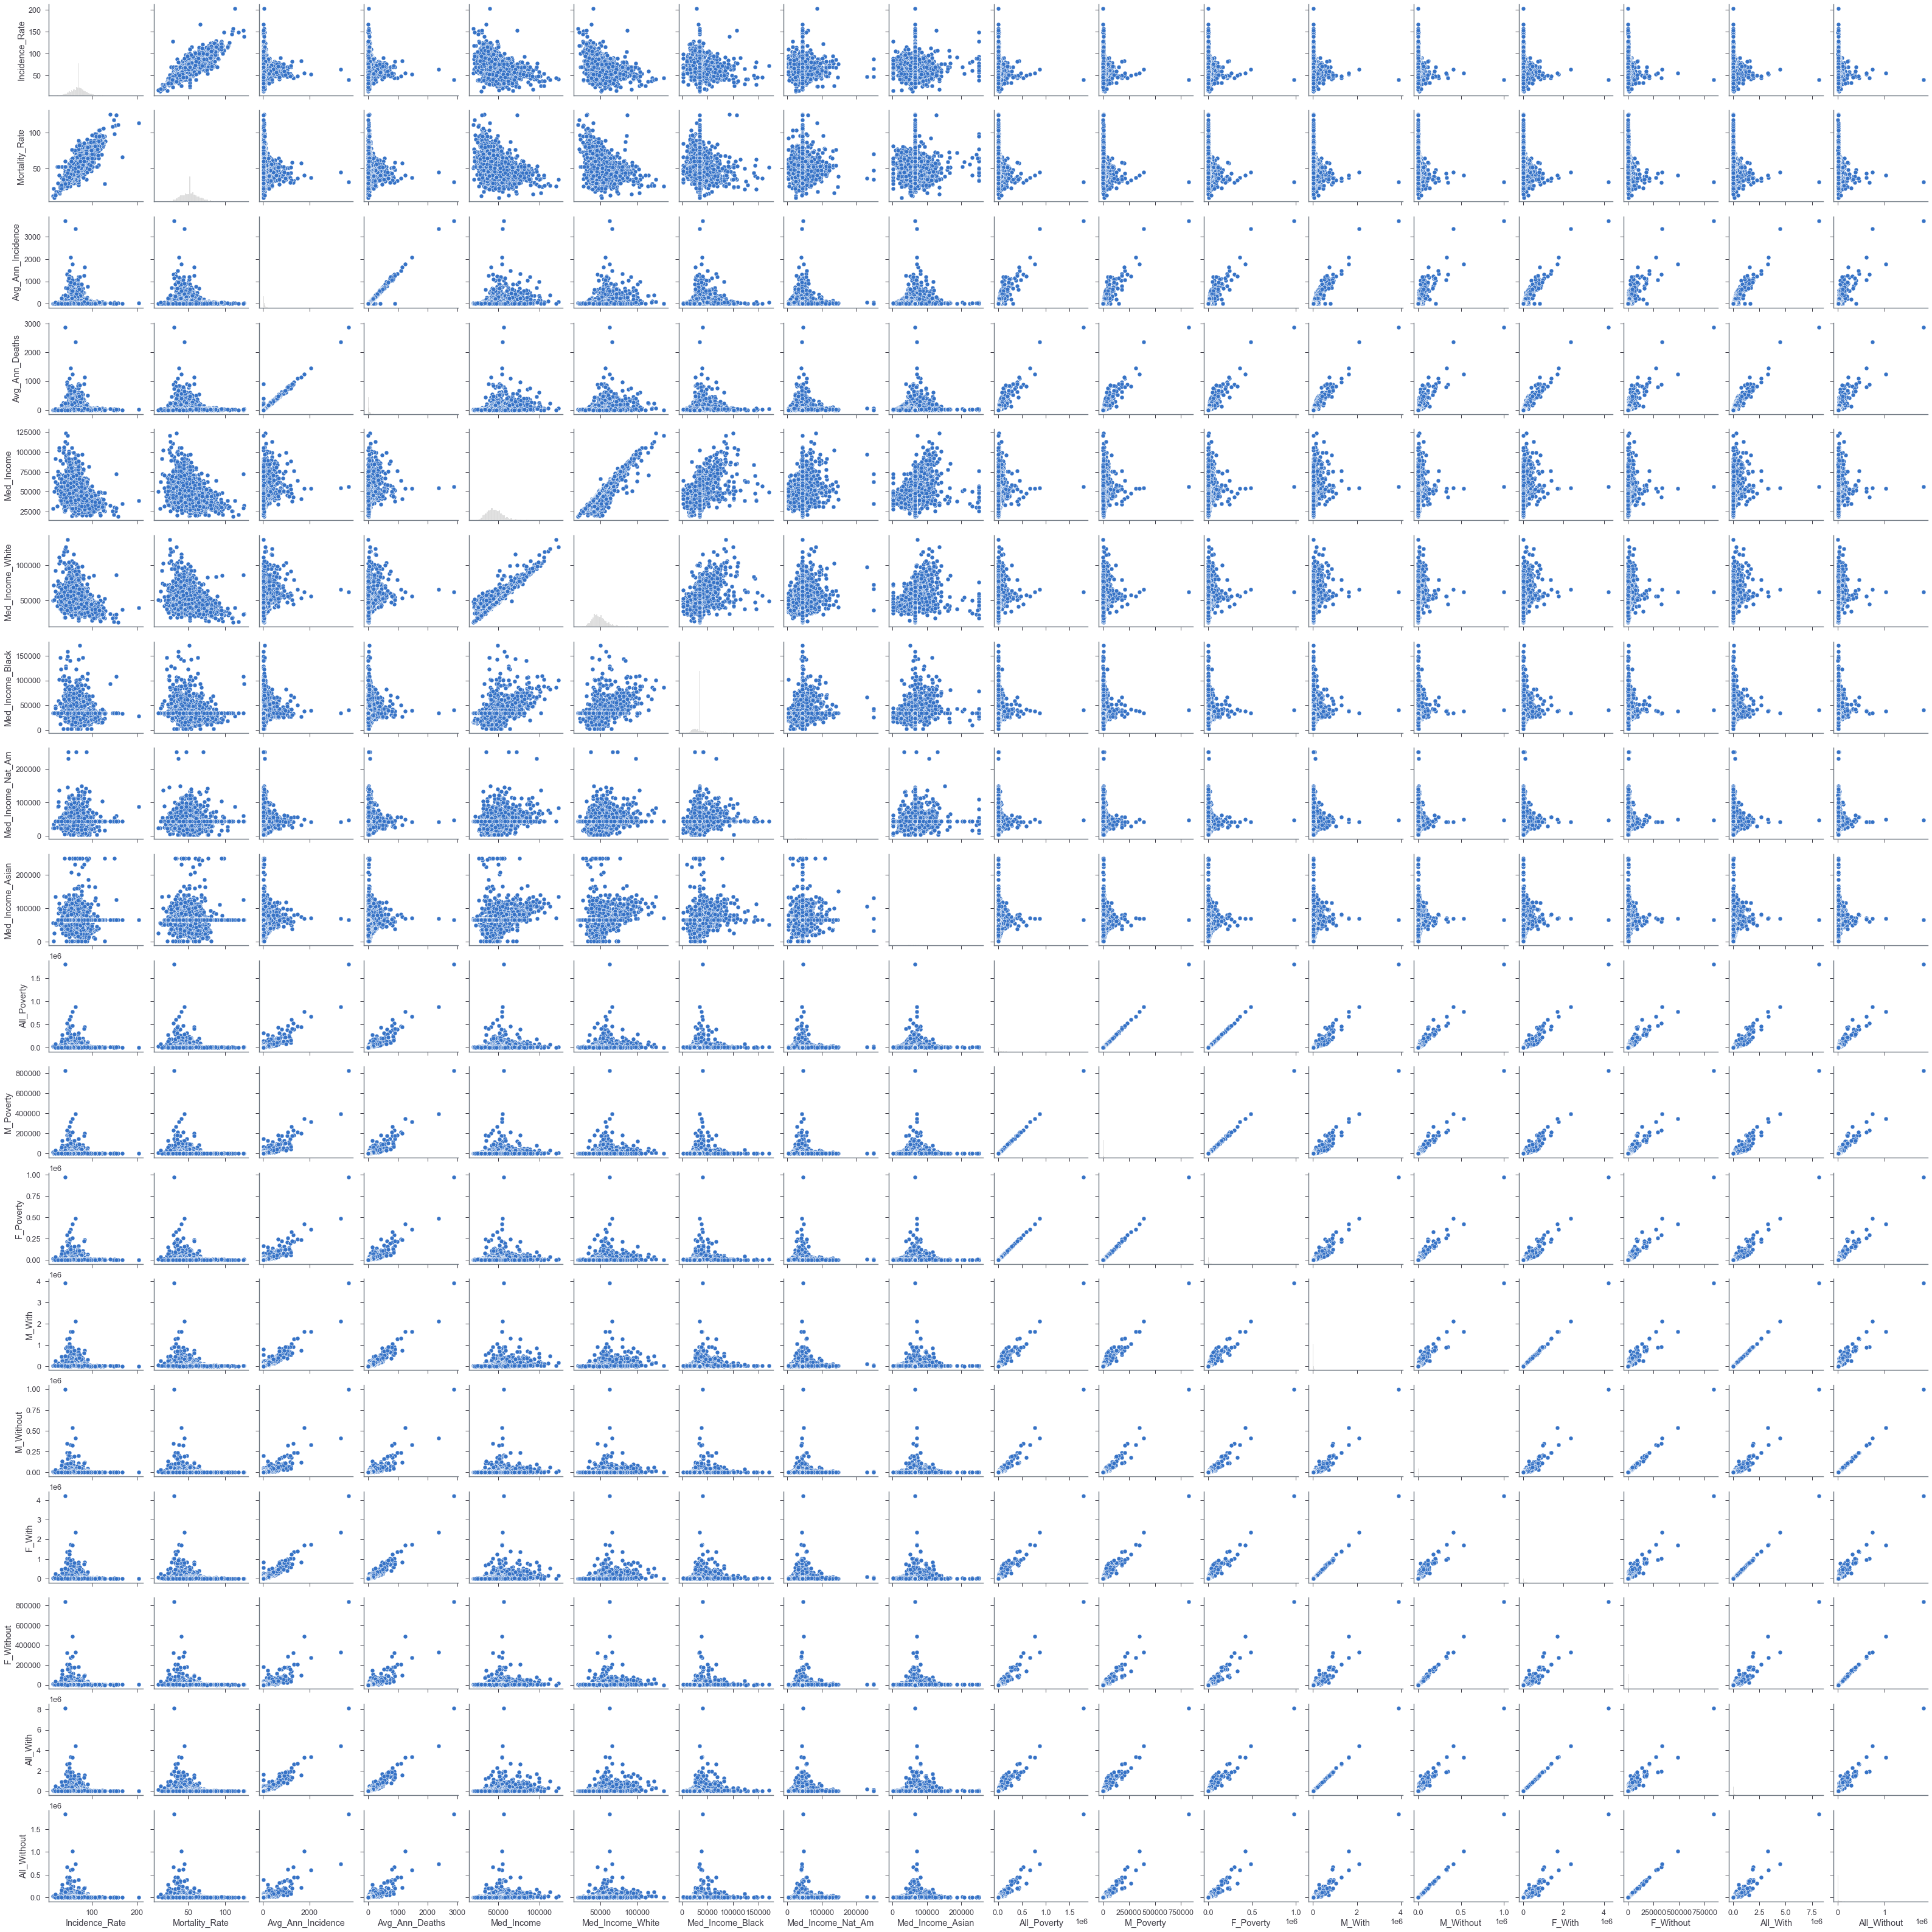

In [39]:
sns.pairplot(df_tcols)

In [40]:
df_tcols.columns

Index(['Incidence_Rate', 'Mortality_Rate', 'Avg_Ann_Incidence',
       'Avg_Ann_Deaths', 'recent_trend', 'Med_Income', 'Med_Income_White',
       'Med_Income_Black', 'Med_Income_Nat_Am', 'Med_Income_Asian',
       'All_Poverty', 'M_Poverty', 'F_Poverty', 'M_With', 'M_Without',
       'F_With', 'F_Without', 'All_With', 'All_Without'],
      dtype='object')

In [41]:
corr_df = df.corr()
corr_dft = df_tcols.corr()

<AxesSubplot:>

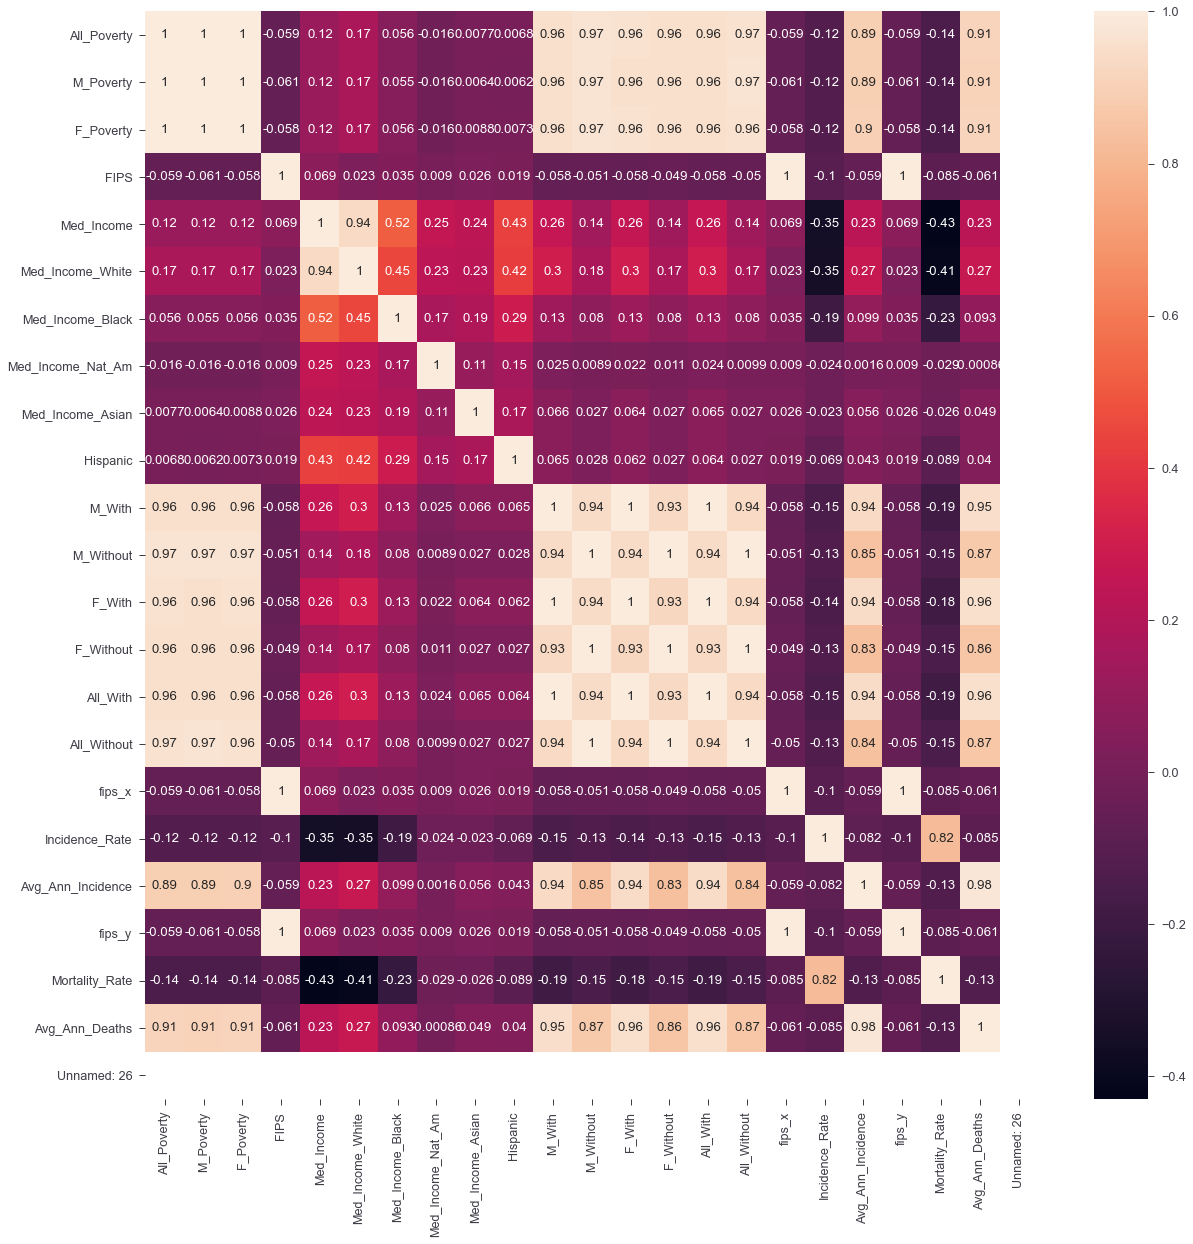

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True)

<AxesSubplot:>

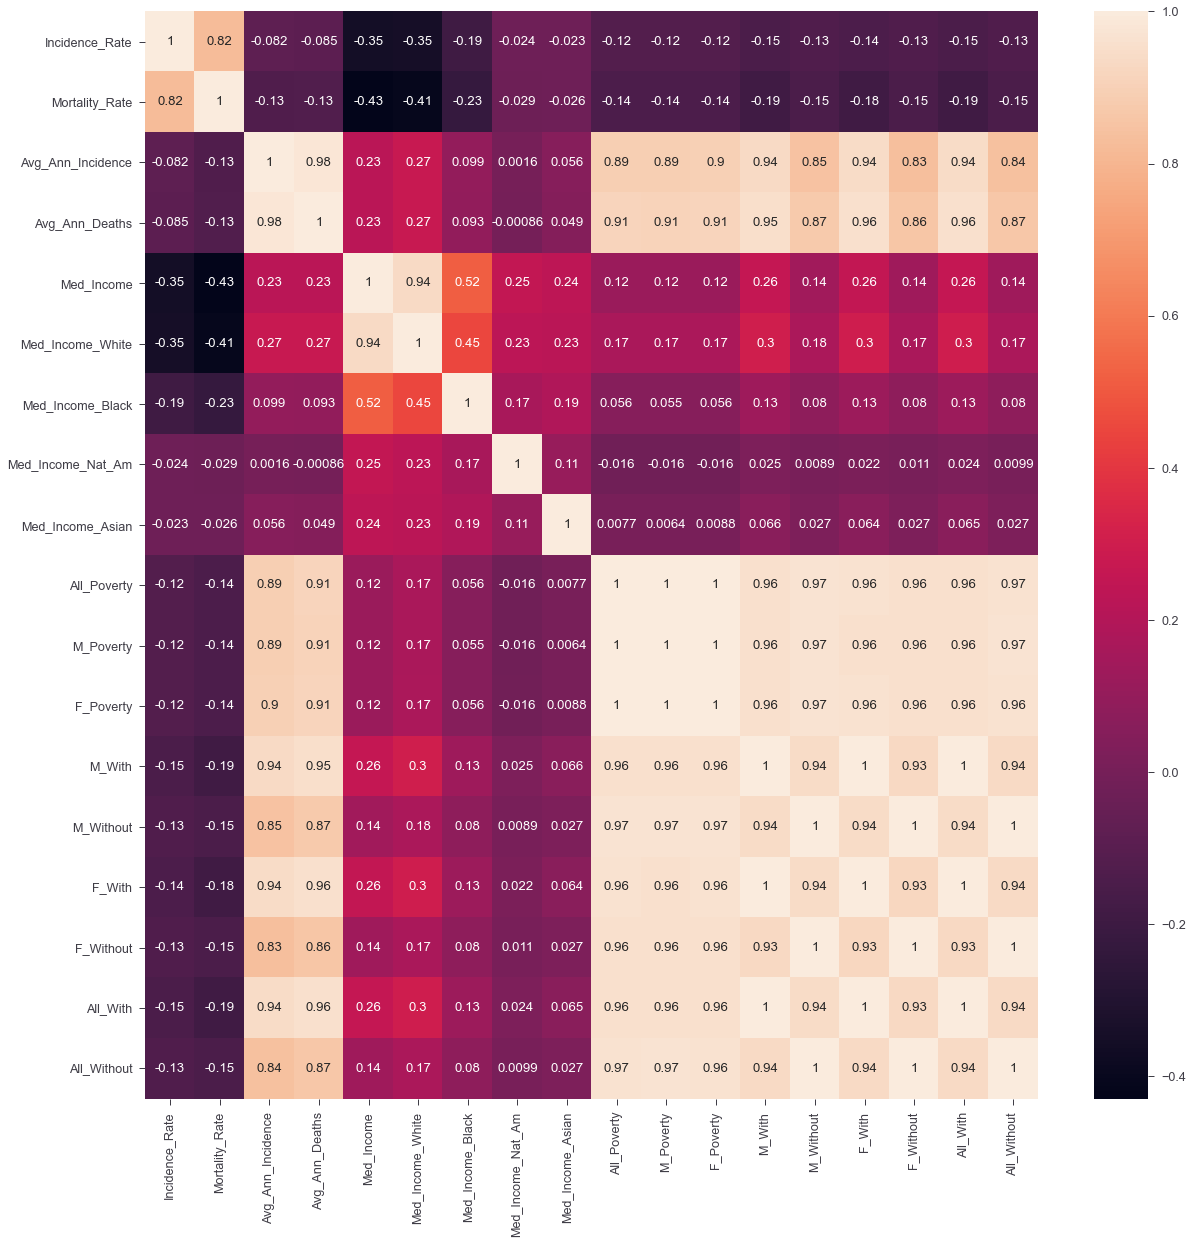

In [43]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_dft, annot=True)

<AxesSubplot:>

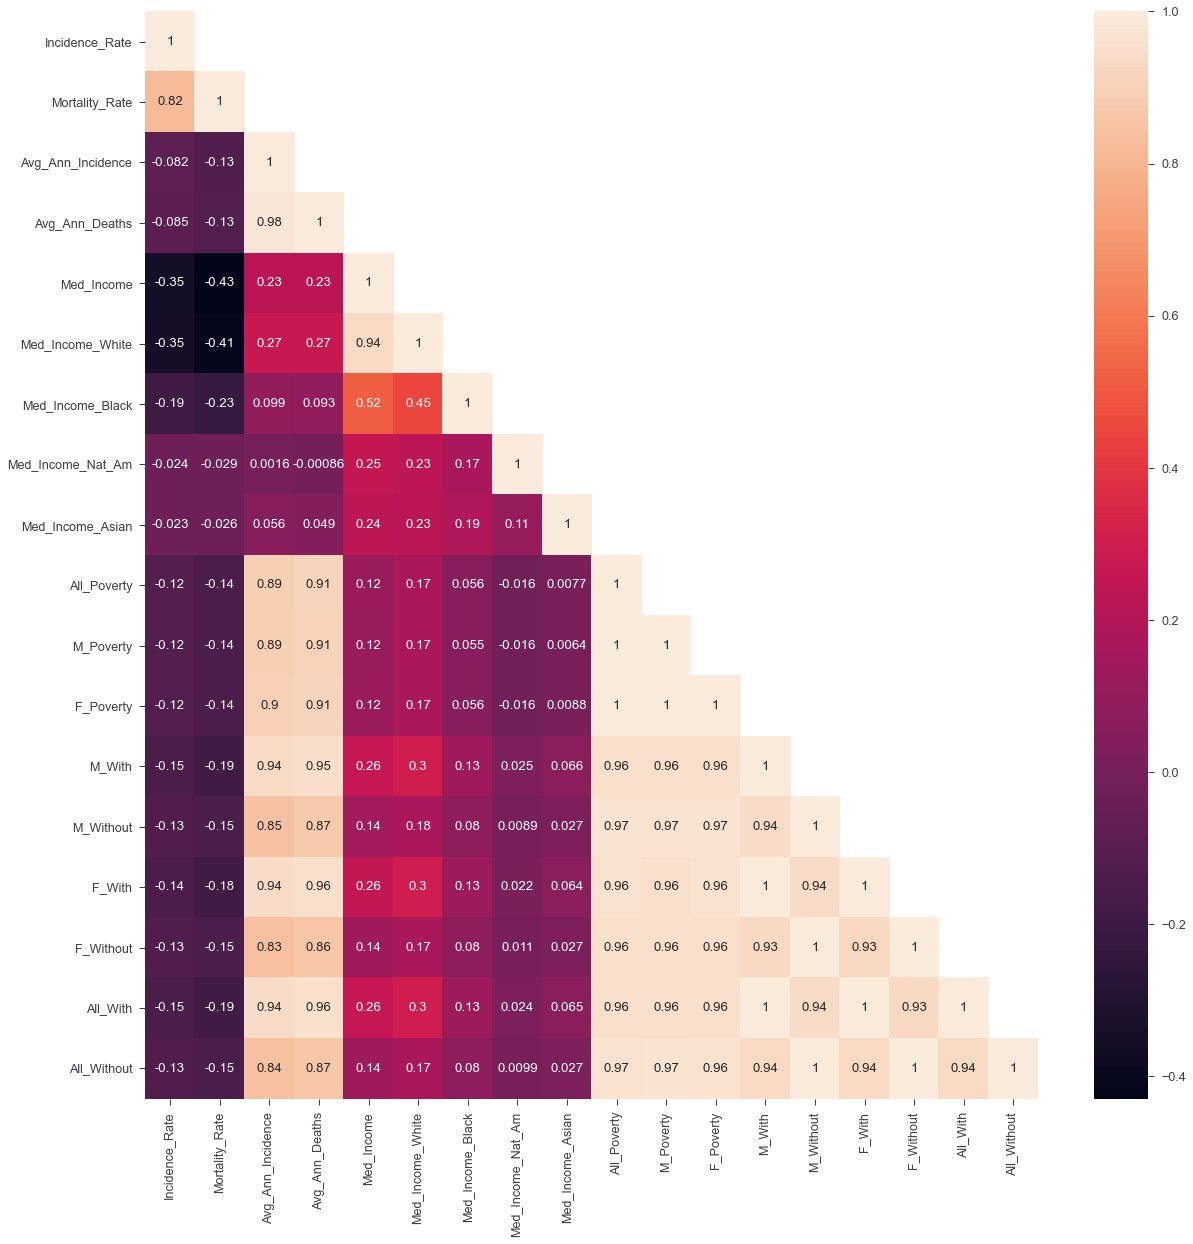

In [44]:
upper_tri = corr_dft.where(np.tril(np.ones(corr_dft.shape),k=0).astype(np.bool))
plt.figure(figsize=(20,20))
sns.heatmap(upper_tri, annot=True)

In [45]:
corr_cols = [column for column in upper_tri.columns if any(upper_tri[column] == 1)]
corr_cols

['Incidence_Rate',
 'Mortality_Rate',
 'Avg_Ann_Incidence',
 'Avg_Ann_Deaths',
 'Med_Income',
 'Med_Income_White',
 'Med_Income_Black',
 'Med_Income_Nat_Am',
 'Med_Income_Asian',
 'All_Poverty',
 'M_Poverty',
 'F_Poverty',
 'M_With',
 'M_Without',
 'F_With',
 'F_Without',
 'All_With',
 'All_Without']

In [46]:
sol = (corr_dft.abs().where(np.triu(np.ones(corr_dft.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))
for index, value in sol.items():
    if value > 0.99:
        print('Pair ', index, '------------> corr:', value)

Pair  ('F_With', 'All_With') ------------> corr: 0.9998757204620757
Pair  ('M_With', 'All_With') ------------> corr: 0.9998531551368142
Pair  ('All_Poverty', 'F_Poverty') ------------> corr: 0.99979202921964
Pair  ('All_Poverty', 'M_Poverty') ------------> corr: 0.9996963953071958
Pair  ('M_Without', 'All_Without') ------------> corr: 0.9995418941399542
Pair  ('M_With', 'F_With') ------------> corr: 0.9994587284338828
Pair  ('F_Without', 'All_Without') ------------> corr: 0.9993799117495462
Pair  ('M_Poverty', 'F_Poverty') ------------> corr: 0.9989859948609926
Pair  ('M_Without', 'F_Without') ------------> corr: 0.9978564203214376


In [47]:
for index, value in sol.items():
    if value > 0.80 and value < 0.99:
        print('Pair ', index, '----------> corr:', value)

Pair  ('Avg_Ann_Incidence', 'Avg_Ann_Deaths') ----------> corr: 0.9831131135984871
Pair  ('M_Poverty', 'M_Without') ----------> corr: 0.9712015495496923
Pair  ('All_Poverty', 'M_Without') ----------> corr: 0.970174831310771
Pair  ('F_Poverty', 'M_Without') ----------> corr: 0.9688794892855301
Pair  ('M_Poverty', 'All_Without') ----------> corr: 0.9668428808262027
Pair  ('All_Poverty', 'All_Without') ----------> corr: 0.9658341292516979
Pair  ('F_Poverty', 'All_Without') ----------> corr: 0.9645556511892549
Pair  ('F_Poverty', 'F_With') ----------> corr: 0.9612400473862112
Pair  ('All_Poverty', 'F_With') ----------> corr: 0.9611306214353597
Pair  ('M_Poverty', 'F_Without') ----------> corr: 0.960657225115215
Pair  ('M_Poverty', 'F_With') ----------> corr: 0.9604651023335163
Pair  ('All_Poverty', 'F_Without') ----------> corr: 0.9596705389582846
Pair  ('All_Poverty', 'All_With') ----------> corr: 0.9595812813687739
Pair  ('F_Poverty', 'All_With') ----------> corr: 0.9595022681069219
Pair

In [48]:
cols_final = ['All_With', 'All_Without', 'All_Poverty', 'Med_Income', 'Med_Income_White']
df1 = df[cols_final]

cols_final2 = ['Avg_Ann_Incidence','Avg_Ann_Deaths','Incidence_Rate', 'Mortality_Rate']
df2 = df[cols_final2]
df1
df2

Avg_Ann_Incidence  Avg_Ann_Deaths  Incidence_Rate  Mortality_Rate
0                     3            21.0       69.500000       52.599998
1                     3            21.0       69.500000       52.599998
2                   131            96.0       61.500000       47.299999
3                     6             5.0       62.700001       58.299999
4                     3            21.0       69.500000       52.599998
...                 ...             ...             ...             ...
3129                 14             9.0       39.900002       28.400000
3130                  5             5.0       23.700001       29.100000
3131                  6             4.0       31.700001       22.100000
3132                  6             5.0       50.000000       38.200001
3133                  4             4.0       44.900002       43.500000

[3134 rows x 4 columns]

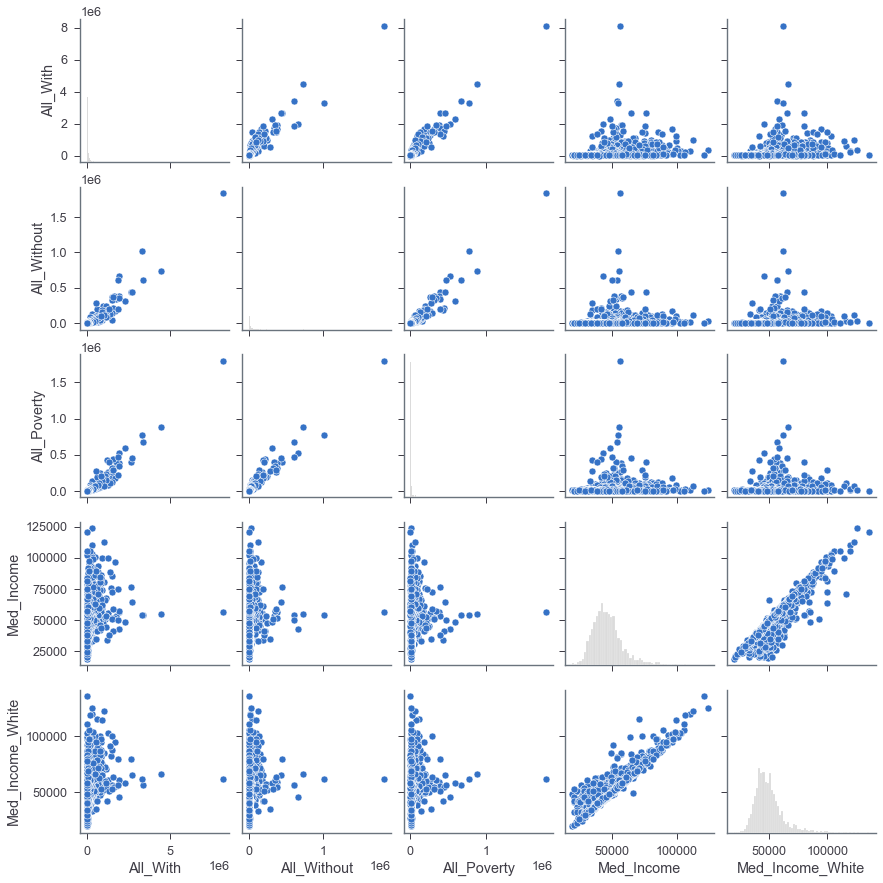

In [49]:
sns.pairplot(df1)

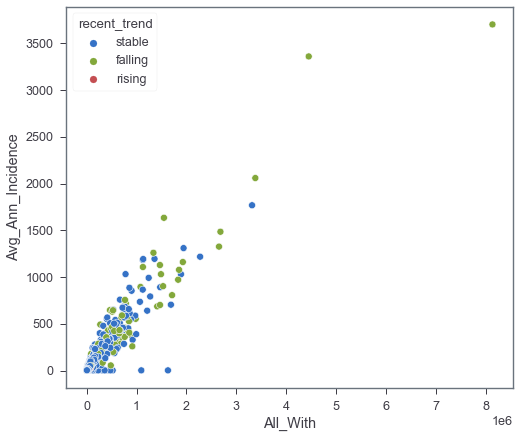

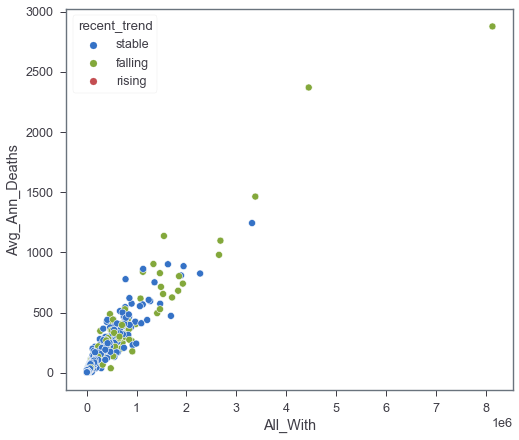

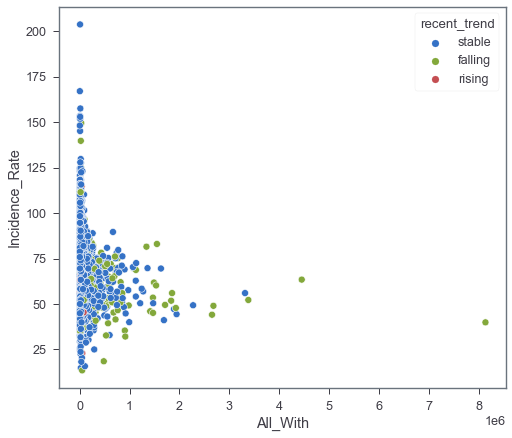

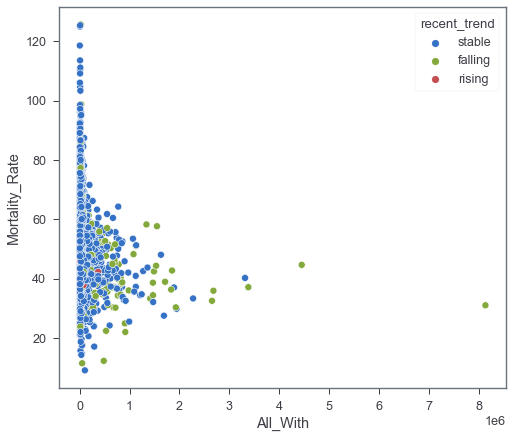

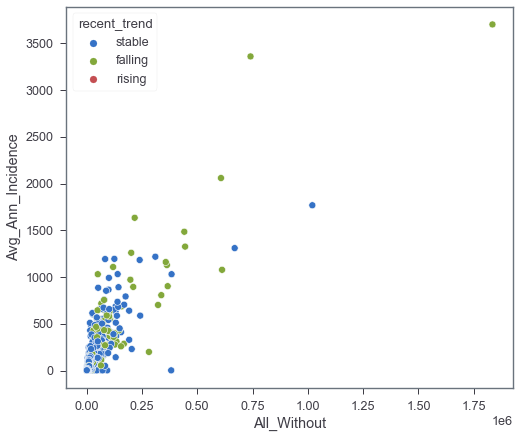

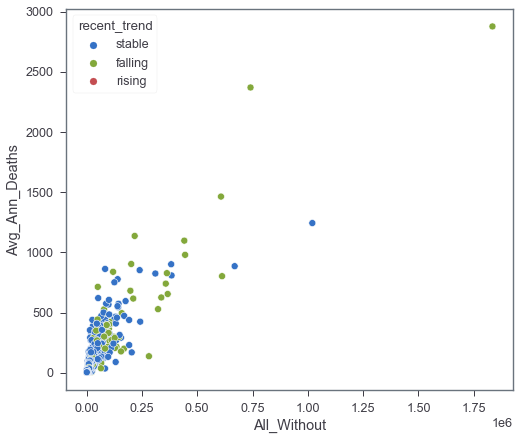

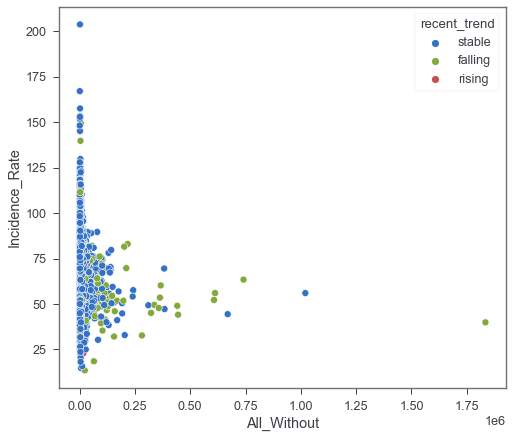

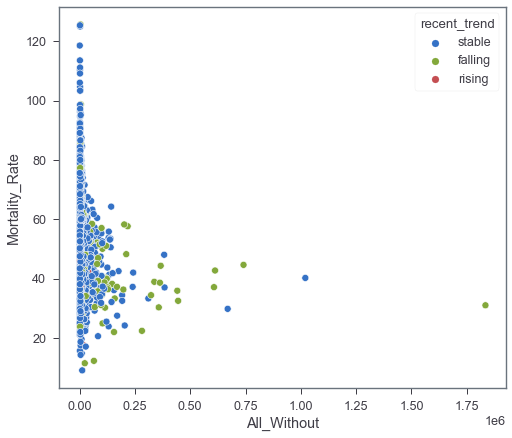

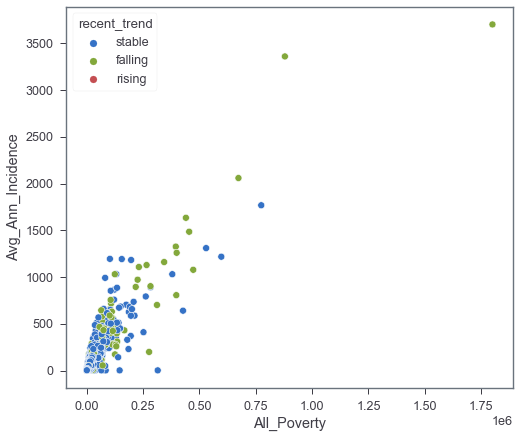

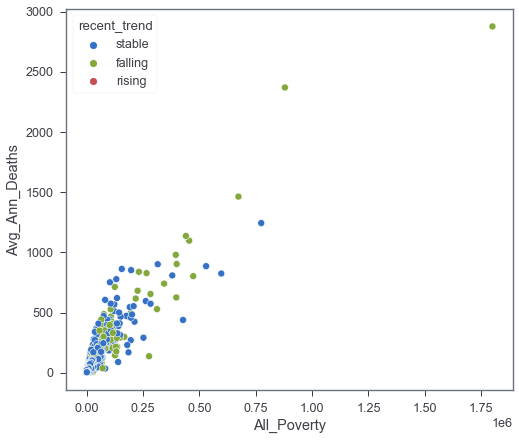

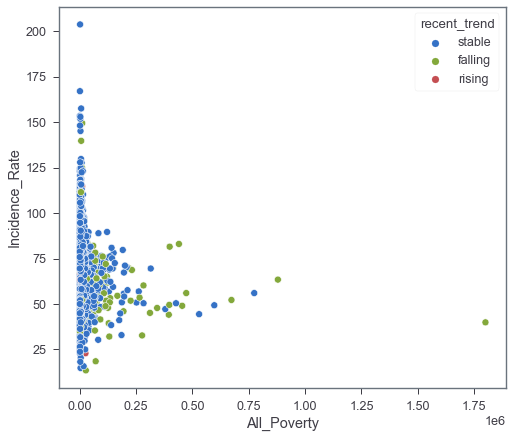

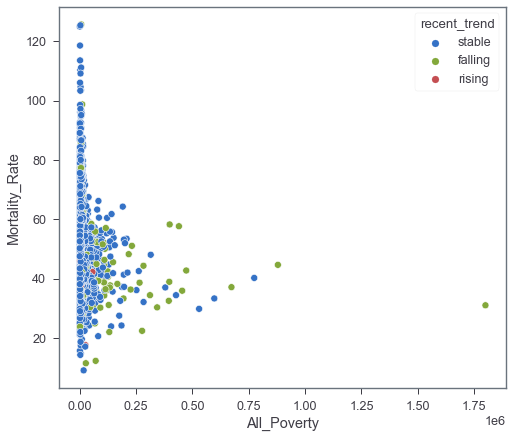

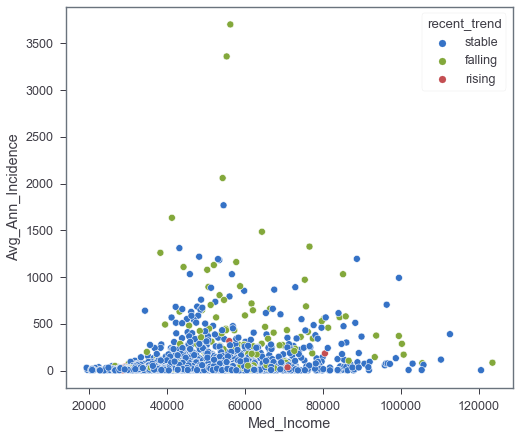

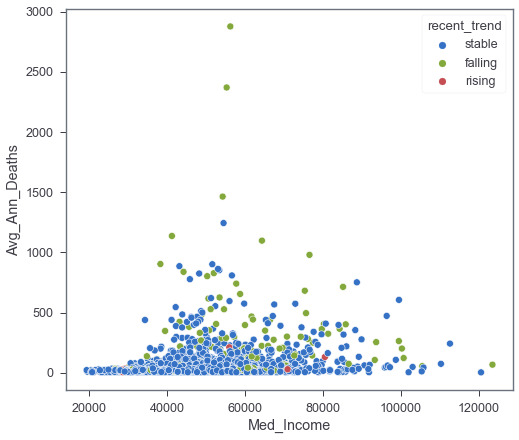

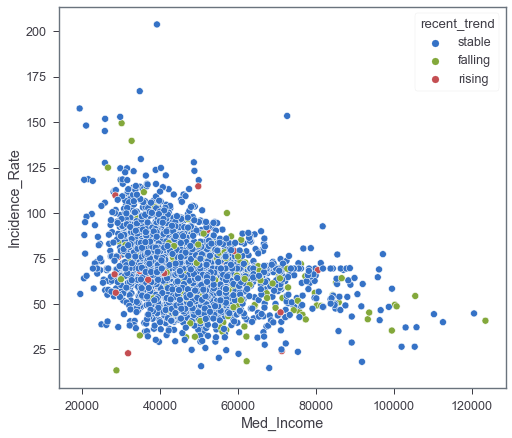

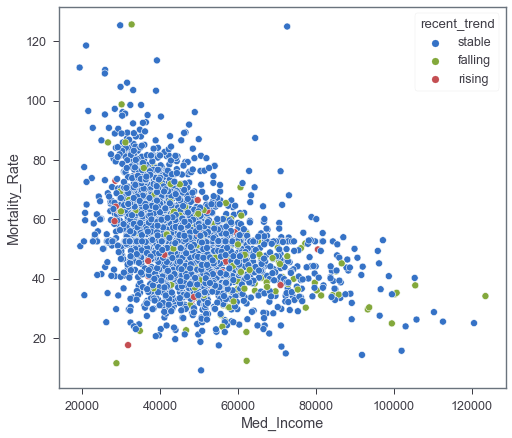

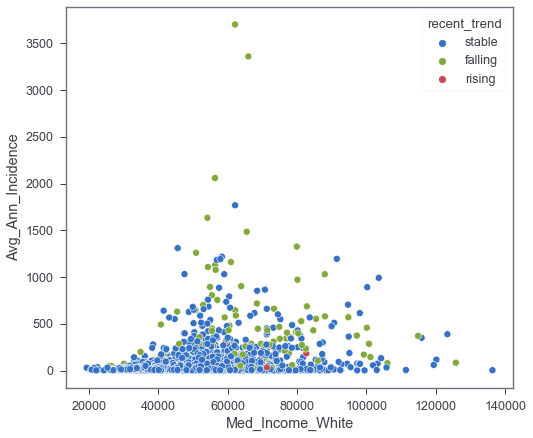

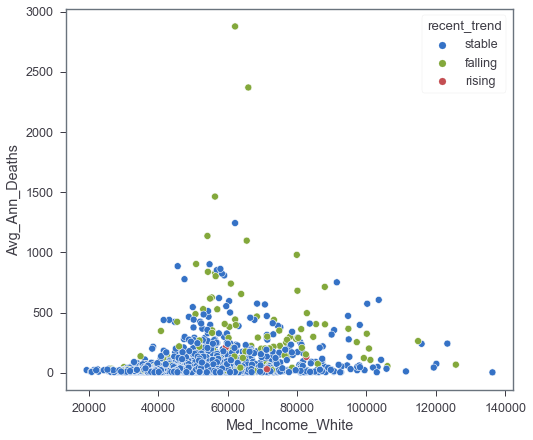

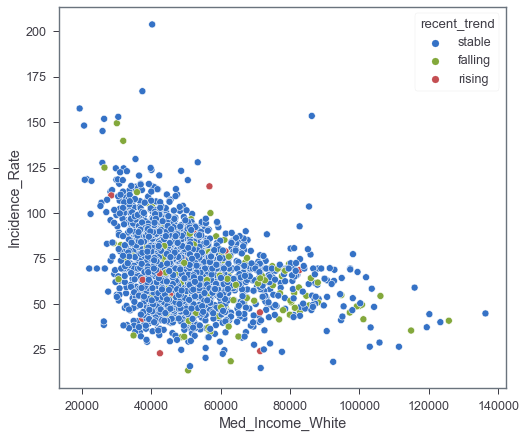

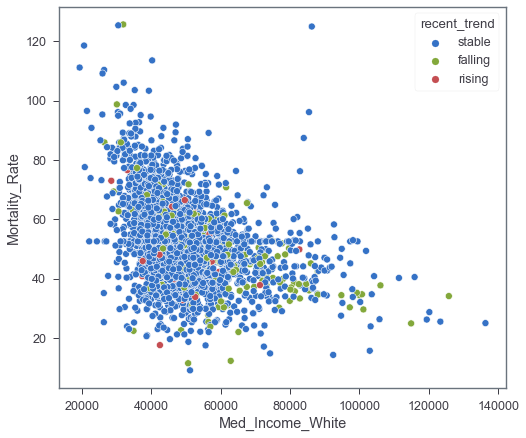

In [50]:
for col in list(df1.columns):
    for col2 in list(df2.columns):
        sns.scatterplot(df1[col], df[col2], hue = df['recent_trend'])
        plt.show()

In [51]:
def reg_plot(x,y):
    """Plots regression line over the scattered data"""
    p = sns.regplot(x, y, data = df, robust=True)
    plt.title(f'{x}  vs.  {y}')
    plt.show()
    slope, intercept, r_value, p_value, std_err = stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
    return  (slope, intercept)

### Average Annual Deaths

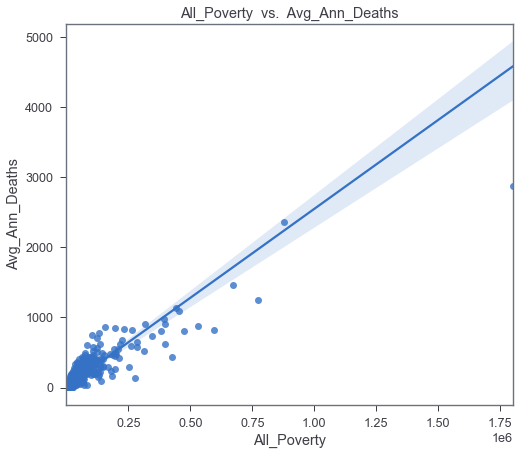

In [52]:
ap_slope, ap_intercept = reg_plot('All_Poverty', 'Avg_Ann_Deaths')

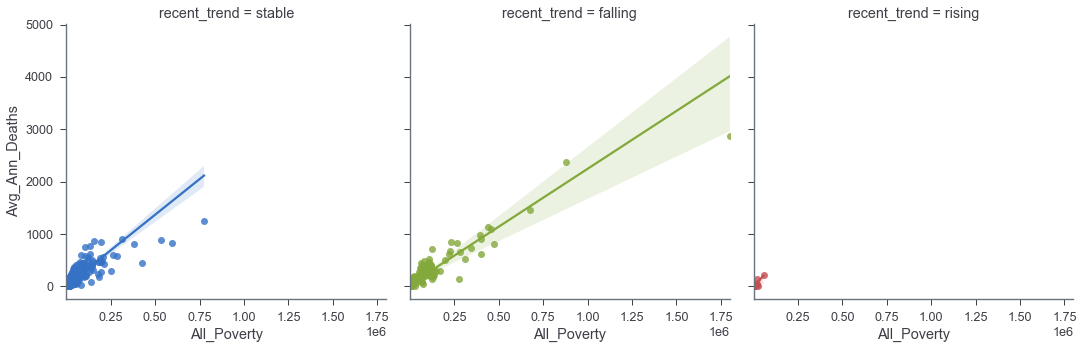

In [53]:
sns.lmplot('All_Poverty', 'Avg_Ann_Deaths',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

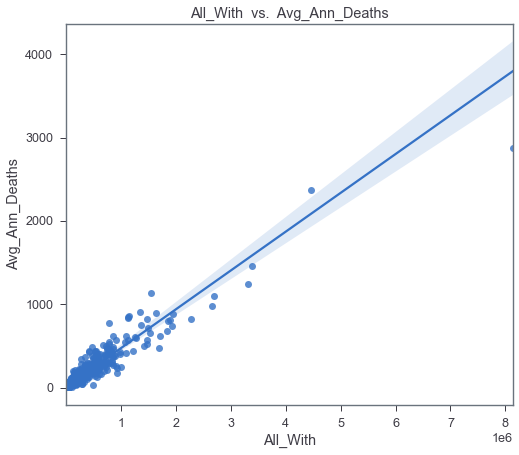

In [54]:
aw_slope, aw_intercept = reg_plot('All_With','Avg_Ann_Deaths')

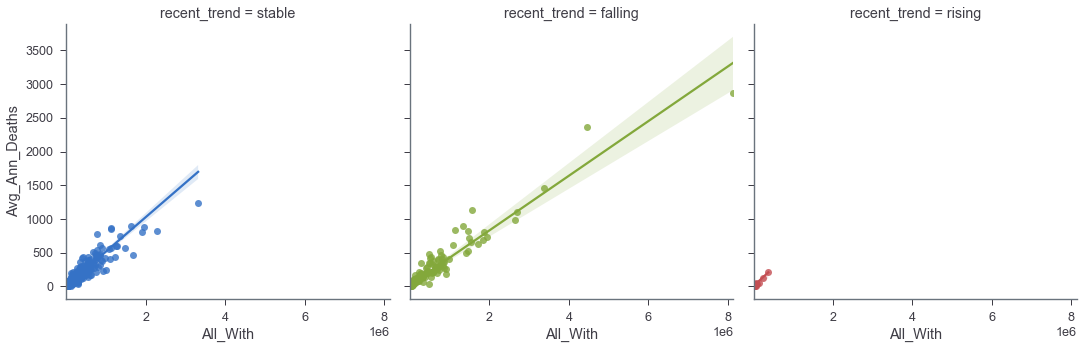

In [55]:
sns.lmplot('All_With', 'Avg_Ann_Deaths',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

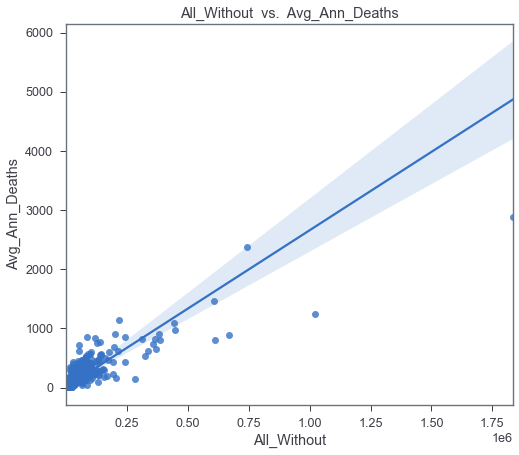

In [56]:
awo_slope, awo_intercept = reg_plot('All_Without','Avg_Ann_Deaths')

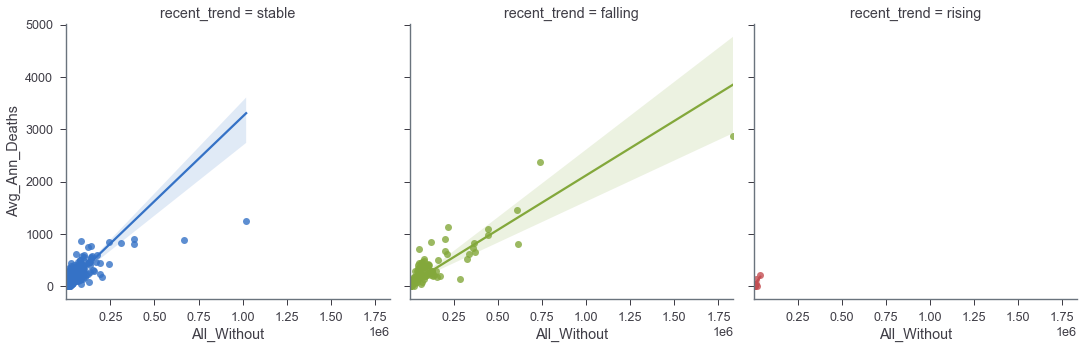

In [57]:
sns.lmplot('All_Without', 'Avg_Ann_Deaths',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

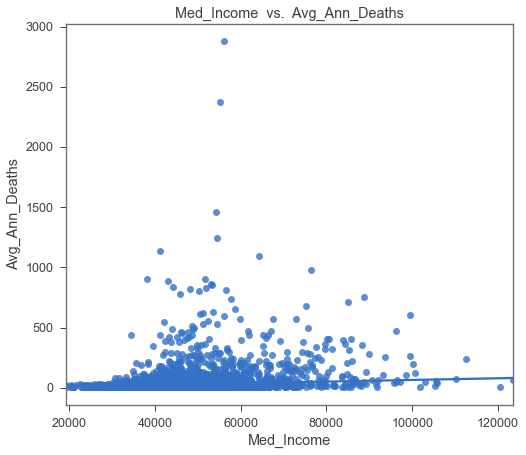

In [58]:
mi_slope, mi_intercept = reg_plot('Med_Income','Avg_Ann_Deaths')

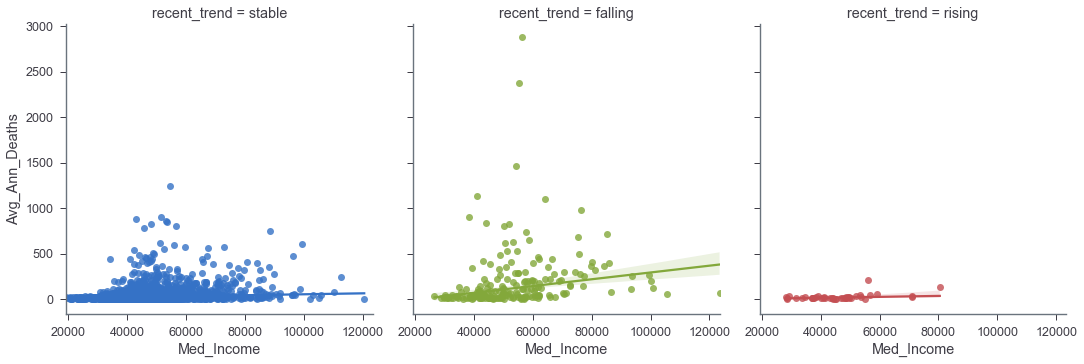

In [59]:
sns.lmplot('Med_Income', 'Avg_Ann_Deaths',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

### Average Annual Incidence

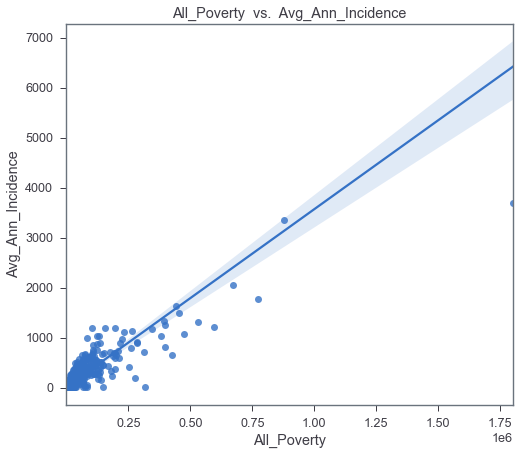

In [60]:
ap_slope, ap_intercept = reg_plot('All_Poverty', 'Avg_Ann_Incidence')

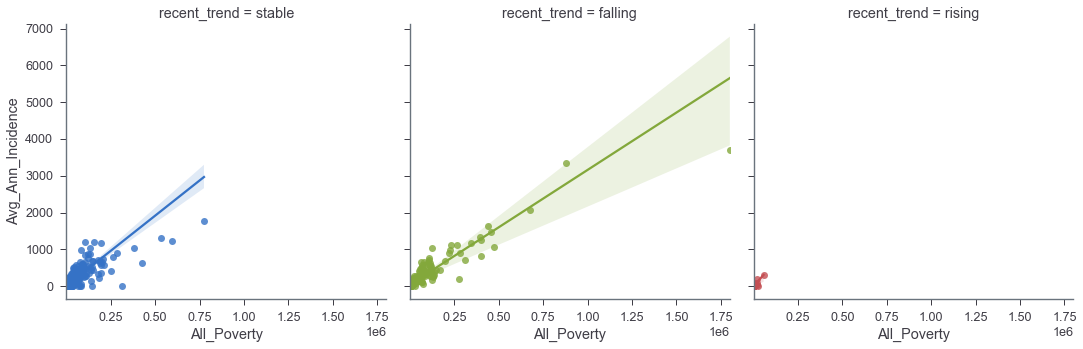

In [61]:
sns.lmplot('All_Poverty', 'Avg_Ann_Incidence',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

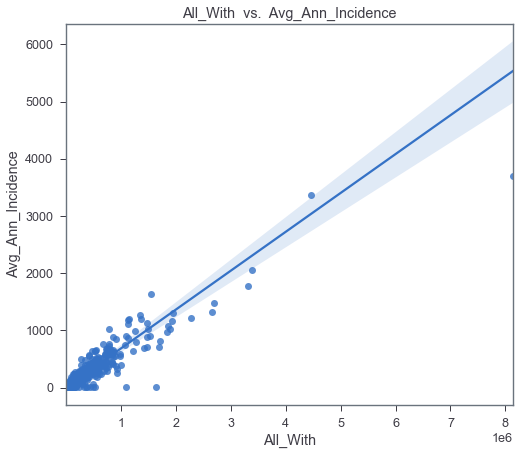

In [62]:
aw_slope, aw_intercept = reg_plot('All_With','Avg_Ann_Incidence')

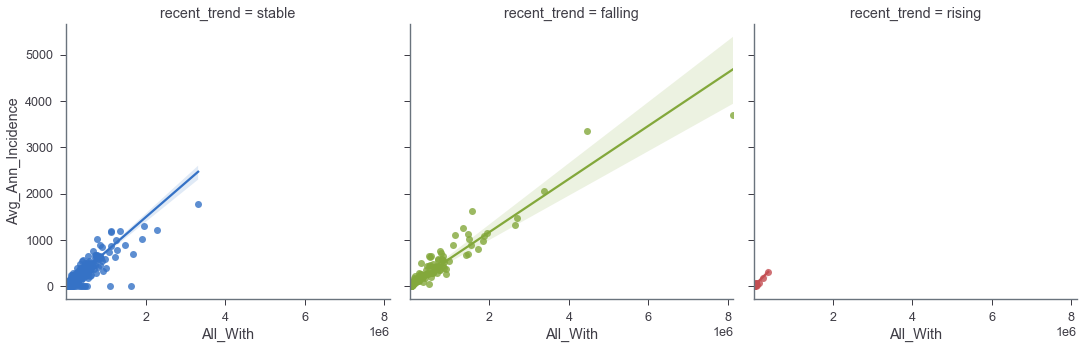

In [63]:
sns.lmplot('All_With', 'Avg_Ann_Incidence',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

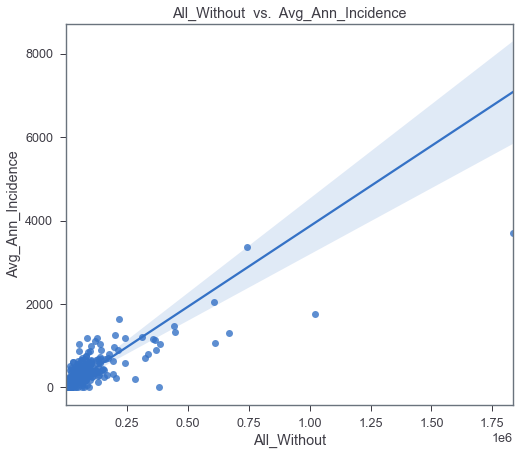

In [64]:
awo_slope, awo_intercept = reg_plot('All_Without','Avg_Ann_Incidence')

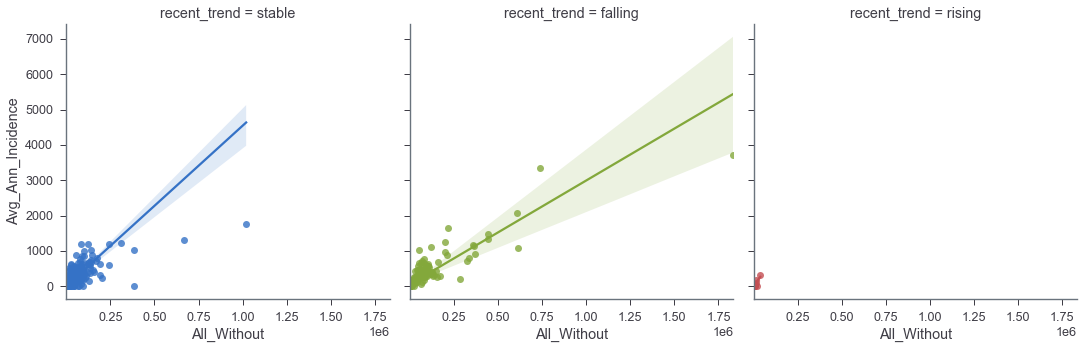

In [65]:
sns.lmplot('All_Without', 'Avg_Ann_Incidence',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

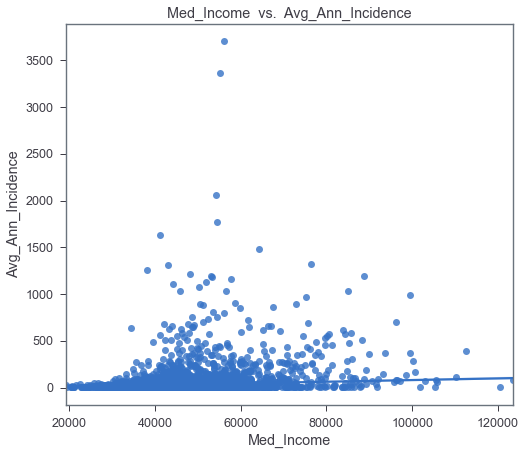

In [66]:
mi_slope, mi_intercept = reg_plot('Med_Income','Avg_Ann_Incidence')

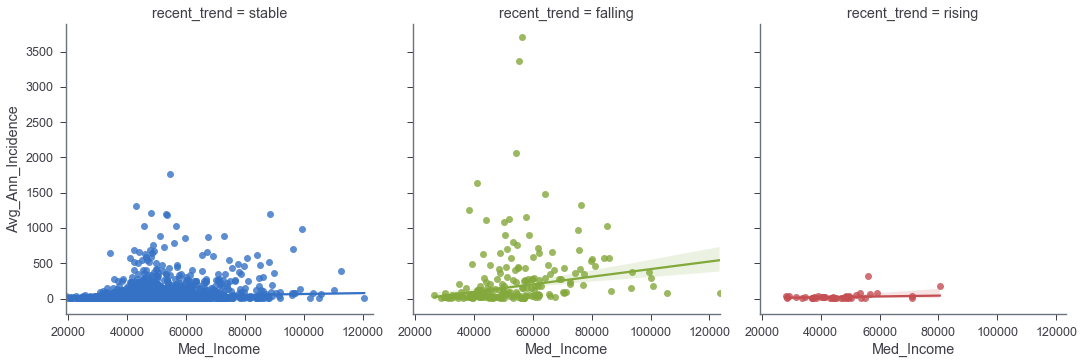

In [67]:
sns.lmplot('Med_Income', 'Avg_Ann_Incidence',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

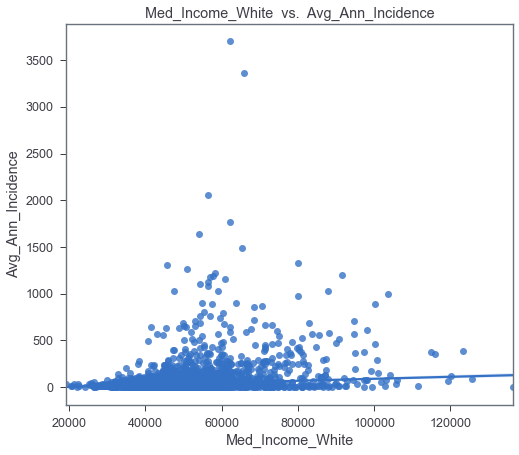

In [68]:
miw_slope, miw_intercept = reg_plot('Med_Income_White','Avg_Ann_Incidence')

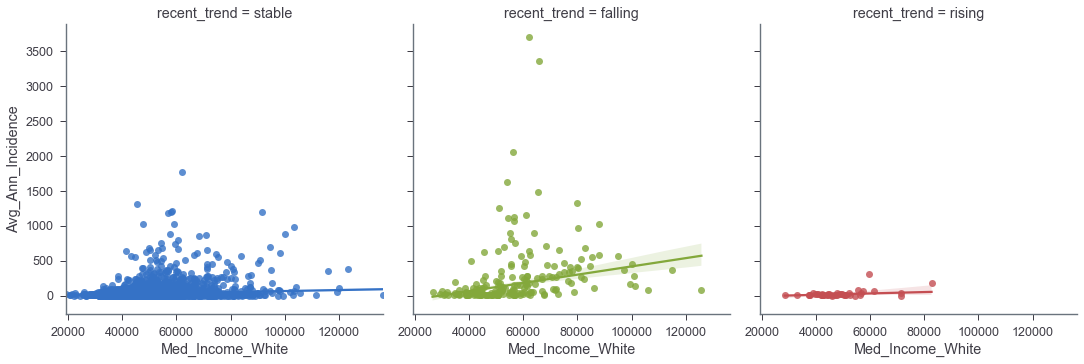

In [69]:
sns.lmplot('Med_Income_White', 'Avg_Ann_Incidence',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

### Mortality

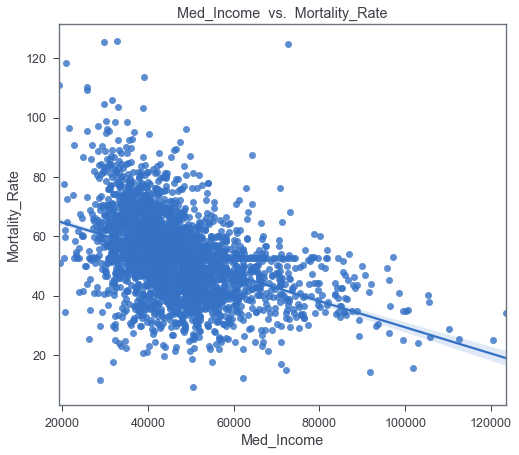

In [70]:
mi_slope, mi_intercept = reg_plot('Med_Income','Mortality_Rate')

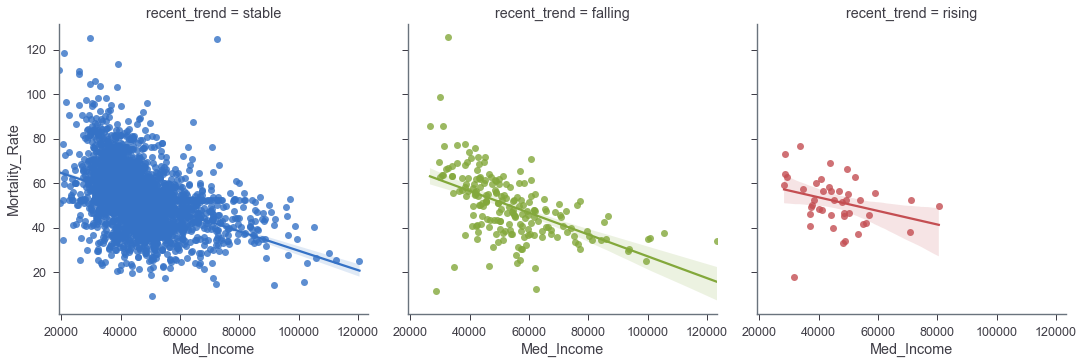

In [71]:
sns.lmplot('Med_Income', 'Mortality_Rate',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

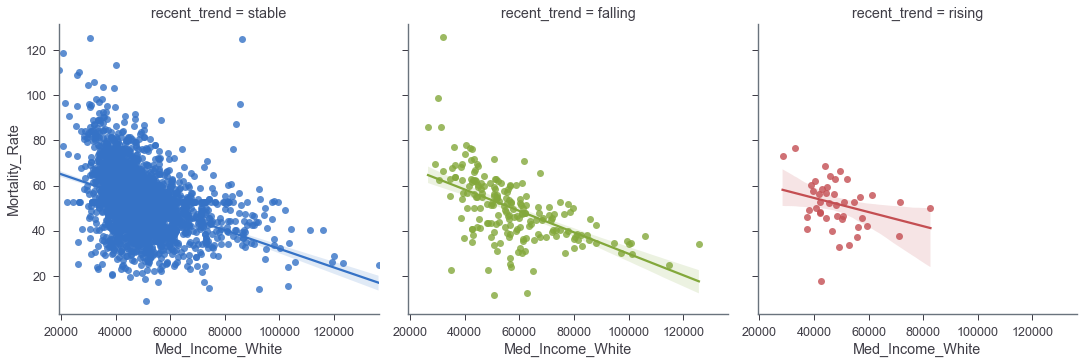

In [72]:
sns.lmplot('Med_Income_White', 'Mortality_Rate',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

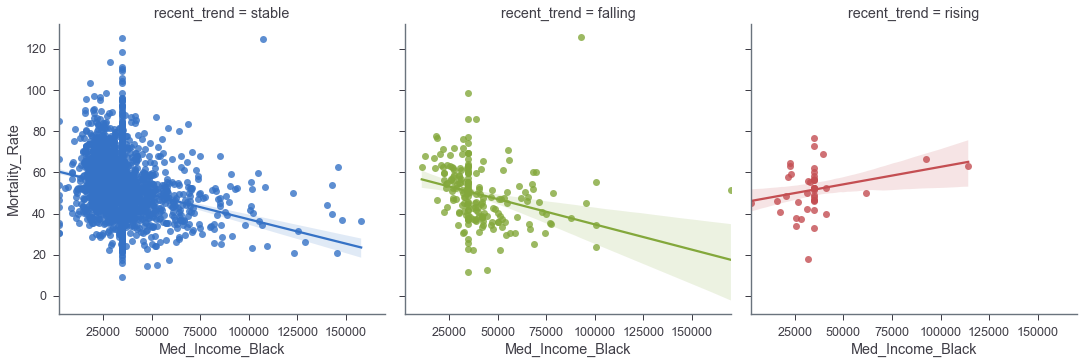

In [73]:
sns.lmplot('Med_Income_Black', 'Mortality_Rate',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

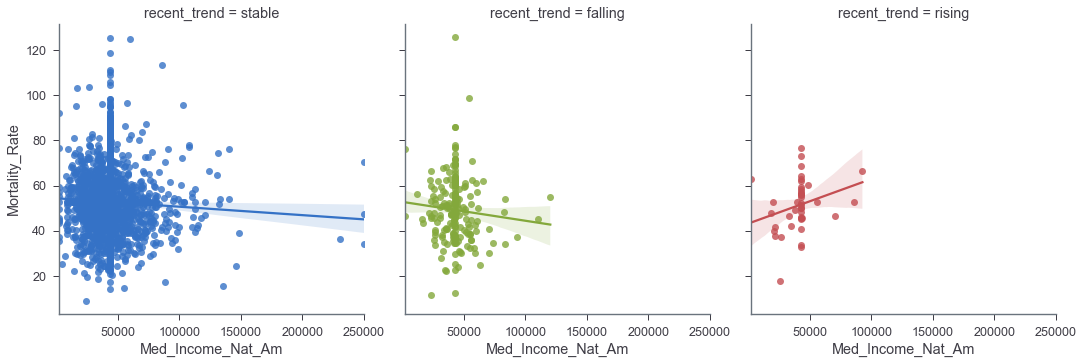

In [74]:
sns.lmplot('Med_Income_Nat_Am', 'Mortality_Rate',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

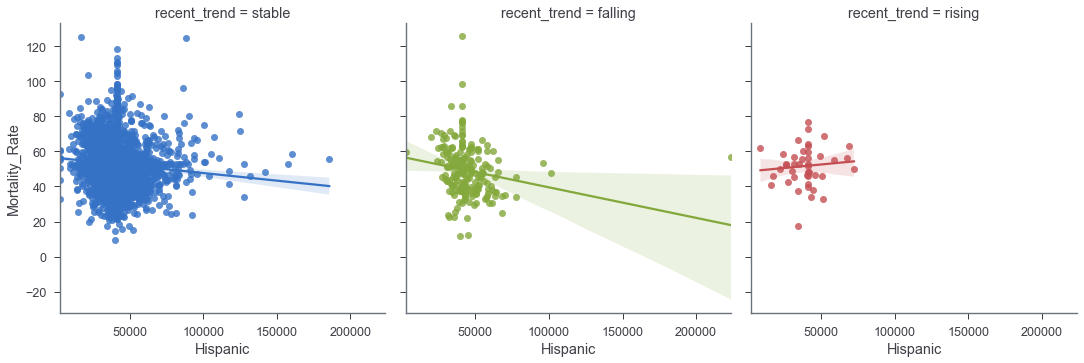

In [75]:
sns.lmplot('Hispanic', 'Mortality_Rate',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

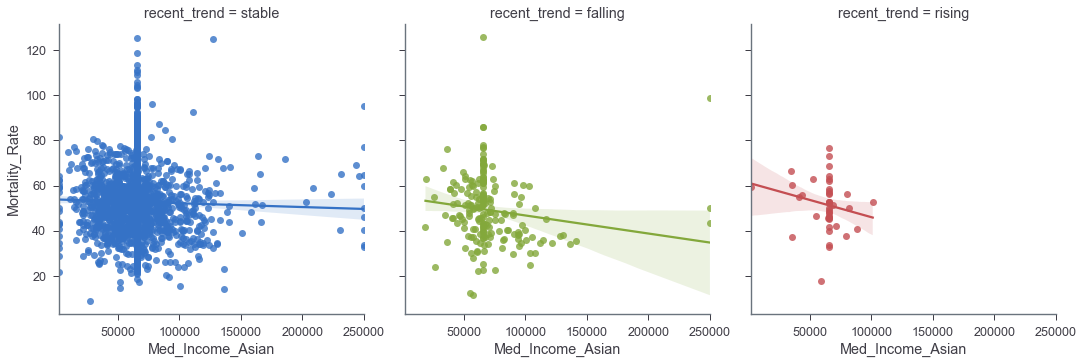

In [76]:
sns.lmplot('Med_Income_Asian', 'Mortality_Rate',data = df, hue = 'recent_trend', col='recent_trend', robust=True)

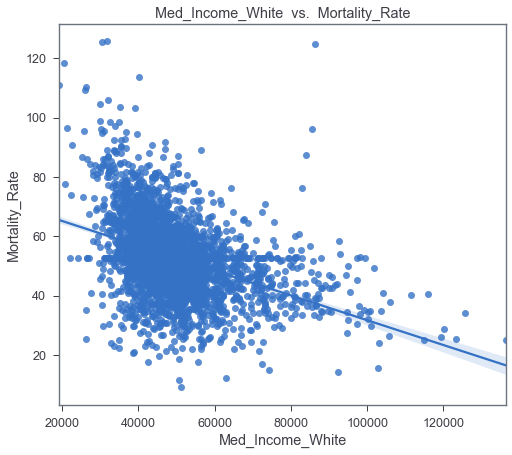

In [77]:
mi_slope, mi_intercept = reg_plot('Med_Income_White','Mortality_Rate')

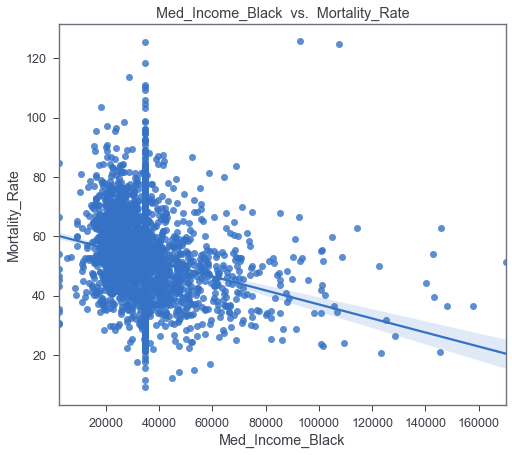

In [78]:
mi_slope, mi_intercept = reg_plot('Med_Income_Black','Mortality_Rate')

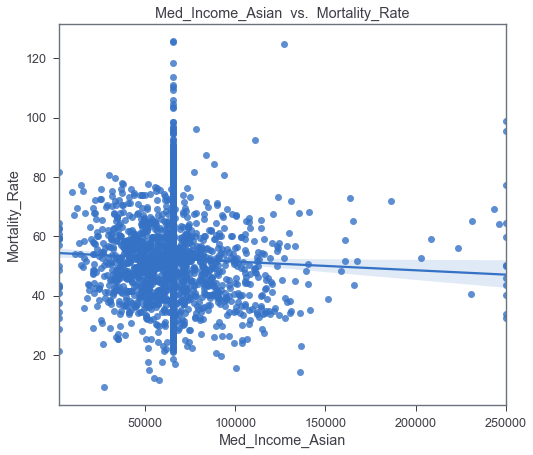

In [79]:
mi_slope, mi_intercept = reg_plot('Med_Income_Asian','Mortality_Rate')

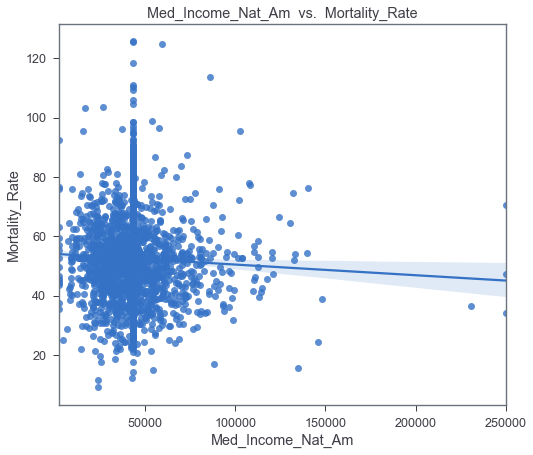

In [80]:
mi_slope, mi_intercept = reg_plot('Med_Income_Nat_Am','Mortality_Rate')

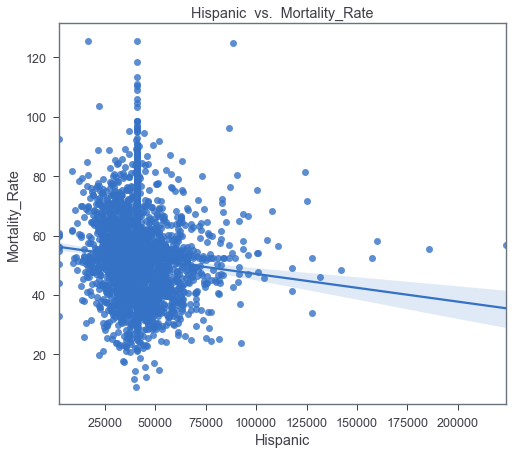

In [81]:
mi_slope, mi_intercept = reg_plot('Hispanic','Mortality_Rate')

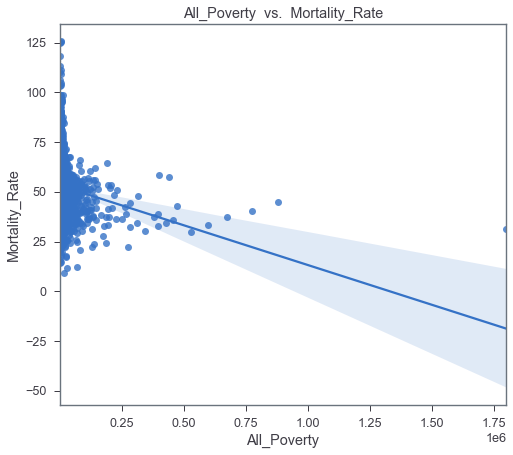

In [82]:
awo_slope, awo_intercept = reg_plot('All_Poverty','Mortality_Rate')

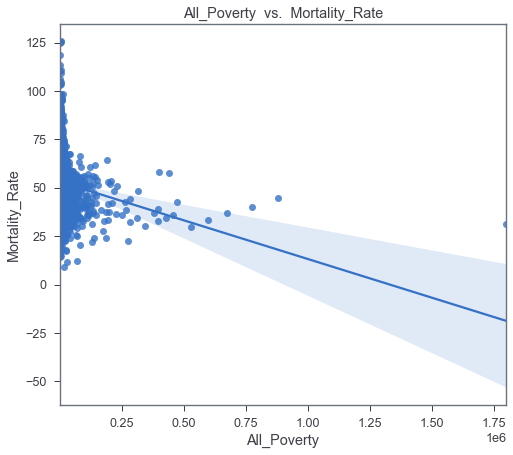

In [83]:
ap_slope, ap_intercept = reg_plot('All_Poverty', 'Mortality_Rate')